# General imports

In [1]:
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

%matplotlib inline
import cv2

In [3]:
COLOR = '#62d197'

# Data

In [4]:
# Path to images folder
path = '../../data/Flipkart/Images/'

In [129]:
# charge from pickle file
data = pd.read_pickle('../../data/cleaned_df.pkl')

images_df = data[['image', 'main_category', 'category_code']].copy()
images_df.head()

image    main_category  category_code
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  Home Furnishing              6
1  7b72c92c2f6c40268628ec5f14c6d590.jpg        Baby Care              5
2  64d5d4a258243731dc7bbb1eef49ad74.jpg        Baby Care              5
3  d4684dcdc759dd9cdf41504698d737d8.jpg  Home Furnishing              6
4  6325b6870c54cd47be6ebfbffa620ec7.jpg  Home Furnishing              6

In [25]:
images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   image          1050 non-null   object
 1   main_category  1050 non-null   object
 2   category_code  1050 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 24.7+ KB


In [135]:
# make main_category to category type
images_df['main_category'] = images_df['main_category'].astype('category')

In [26]:
images_df.groupby('main_category').count().reset_index()

main_category  image  category_code
0                   Baby Care    150            150
1    Beauty and Personal Care    150            150
2                   Computers    150            150
3  Home Decor & Festive Needs    150            150
4             Home Furnishing    150            150
5            Kitchen & Dining    150            150
6                     Watches    150            150

In [16]:
classes = list(images_df['category_code'].unique())
classes

[6, 5, 3, 2, 4, 1, 0]

In [92]:
# get the unique association between categories and codes
category_code = images_df[['category_code', 'main_category']].drop_duplicates().sort_values('category_code')

# create a dictionary with category codes and names
categories_map = dict(zip(category_code.category_code, category_code.main_category))
categories_map

{0: 'Computers',
 1: 'Beauty and Personal Care',
 2: 'Home Decor & Festive Needs',
 3: 'Watches',
 4: 'Kitchen & Dining',
 5: 'Baby Care',
 6: 'Home Furnishing'}

Category: Home Furnishing


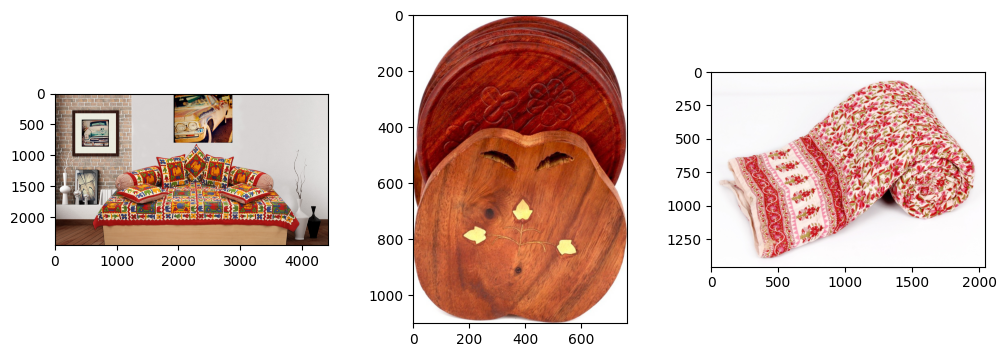

Category: Baby Care


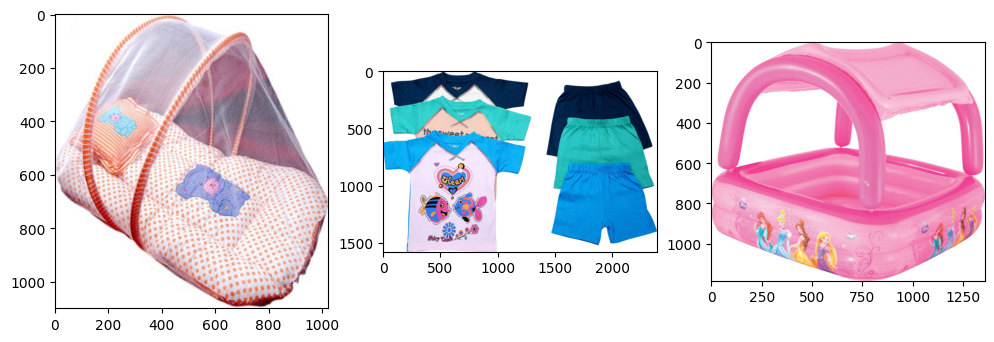

Category: Watches


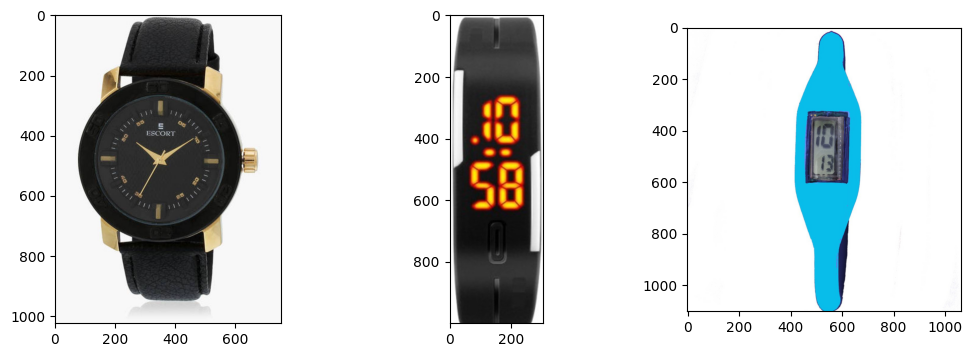

Category: Home Decor & Festive Needs


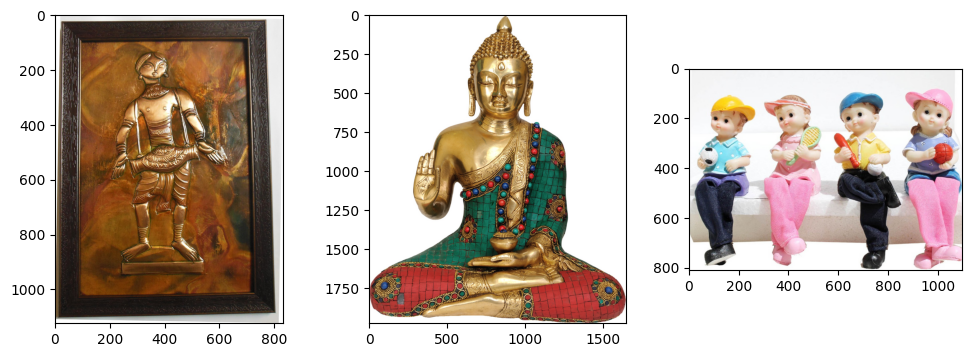

Category: Kitchen & Dining


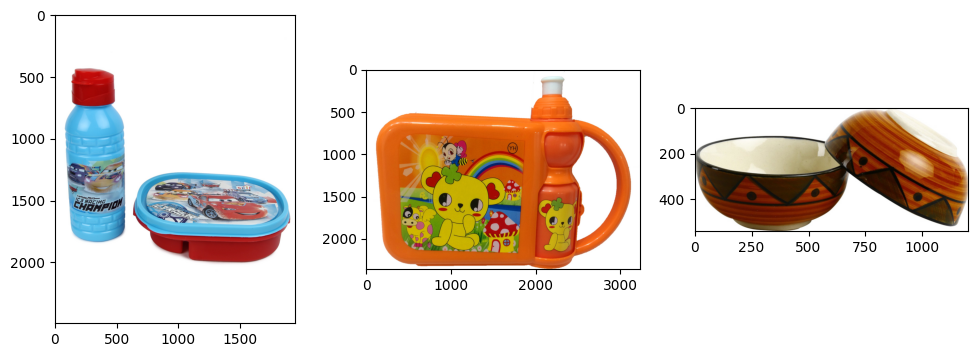

Category: Beauty and Personal Care


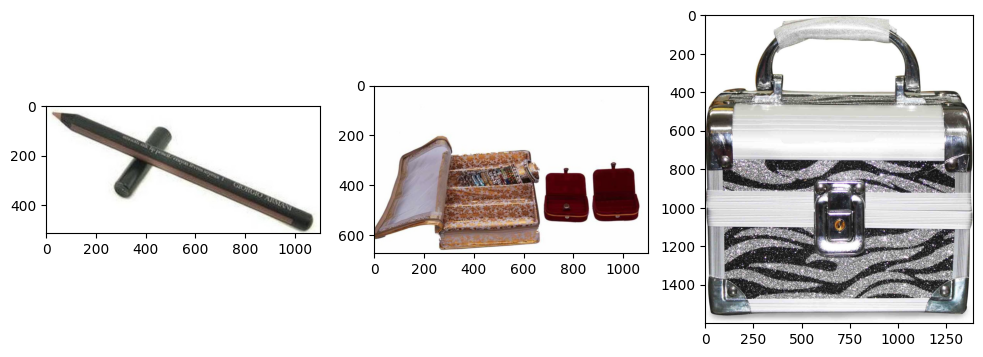

Category: Computers


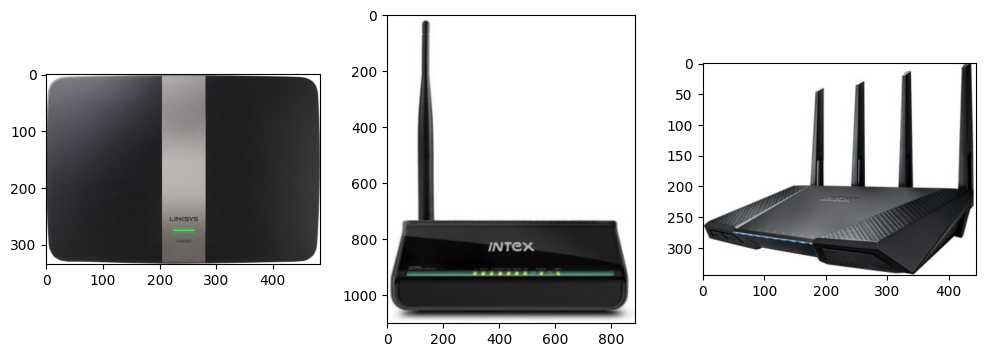

In [60]:
def list_fct(name):
    list_img = images_df['image'].tolist()
    list_image_name = [list_img[i] for i in range(len(images_df)) if images_df['main_category'][i] == name]
    return list_image_name

# Display 3 images for each category
for category in classes:
    print(f'Category: {category}')
    plt.figure(figsize=(12, 4))
    for i in range(3):
        plt.subplot(1, 3, i+1)
        filename = path + list_fct(category)[i+10]
        image = imread(filename)
        plt.imshow(image)

    plt.show()

# EDA

### Functions

In [30]:
def list_fct(category:str, image: str, path:str=path):
    list_image_name = [path + image[i] for i in range(len(images_df)) if images_df['main_category'][i] == category]
    return list_image_name

def extract_img_features(image, flag: object = cv2.IMREAD_COLOR, images_path: str = path) -> pd.DataFrame:
    """Extract image features from a list of images.

    Args:
        image (str): the name of the image
        flag (object): the flag to read the images (default: cv2.IMREAD_COLOR)
        images_path (str): the path to the images (default: path)
    Returns:
        m
    """
    try:
        image = cv2.imread(images_path + image, flag) # returns an array [height, width, channels]
        return image.shape[0], image.shape[1], image.shape[2], image.size
    except Exception as e:
        print(f'Error reading image: {image}')
        print(f'Error: {e}')
        return  None * 4

## Images features

In [34]:
images_df['height'], images_df['width'], images_df['channels'], images_df['size'] = zip(*images_df['image'].map(extract_img_features))

In [35]:
images_df.loc[images_df['image'] == '9743e6d1c9f3180483825fe4d2e97836.jpg']

image main_category  category_code  \
343  9743e6d1c9f3180483825fe4d2e97836.jpg     Computers              0   

     height  width  channels    size  
343     541    534         3  866682

In [36]:
images_df.describe()

category_code        height        width  channels          size
count    1050.000000   1050.000000  1050.000000    1050.0  1.050000e+03
mean        3.000000   1220.038095  1196.570476       3.0  5.748901e+06
std         2.000953    744.841368   864.076765       0.0  1.175770e+07
min         0.000000    160.000000   145.000000       3.0  1.740000e+05
25%         1.000000    844.000000   747.250000       3.0  2.017125e+06
50%         3.000000   1100.000000  1100.000000       3.0  3.047550e+06
75%         5.000000   1360.000000  1214.250000       3.0  4.661820e+06
max         6.000000  11042.000000  8484.000000       3.0  2.810410e+08

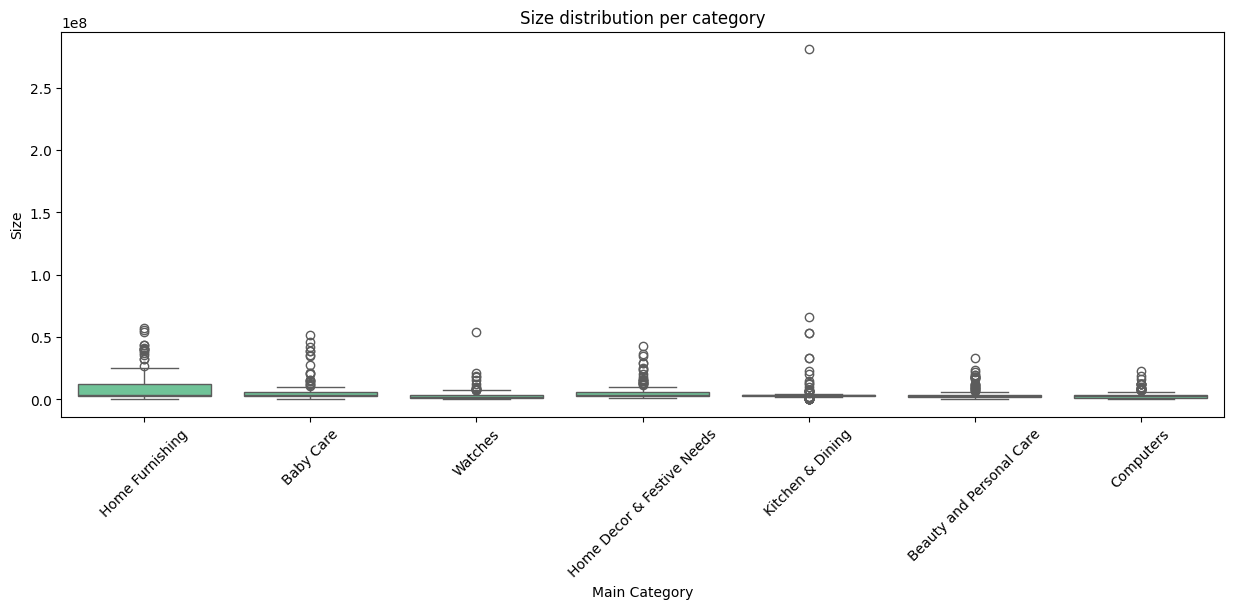

In [37]:
# Display stats per categories
plt.figure(figsize=(15, 5))
sns.boxplot(x='main_category', y='size', data=images_df, color=COLOR)
plt.title('Size distribution per category')
plt.xlabel('Main Category')
plt.ylabel('Size')
plt.xticks(rotation=45)
plt.show()

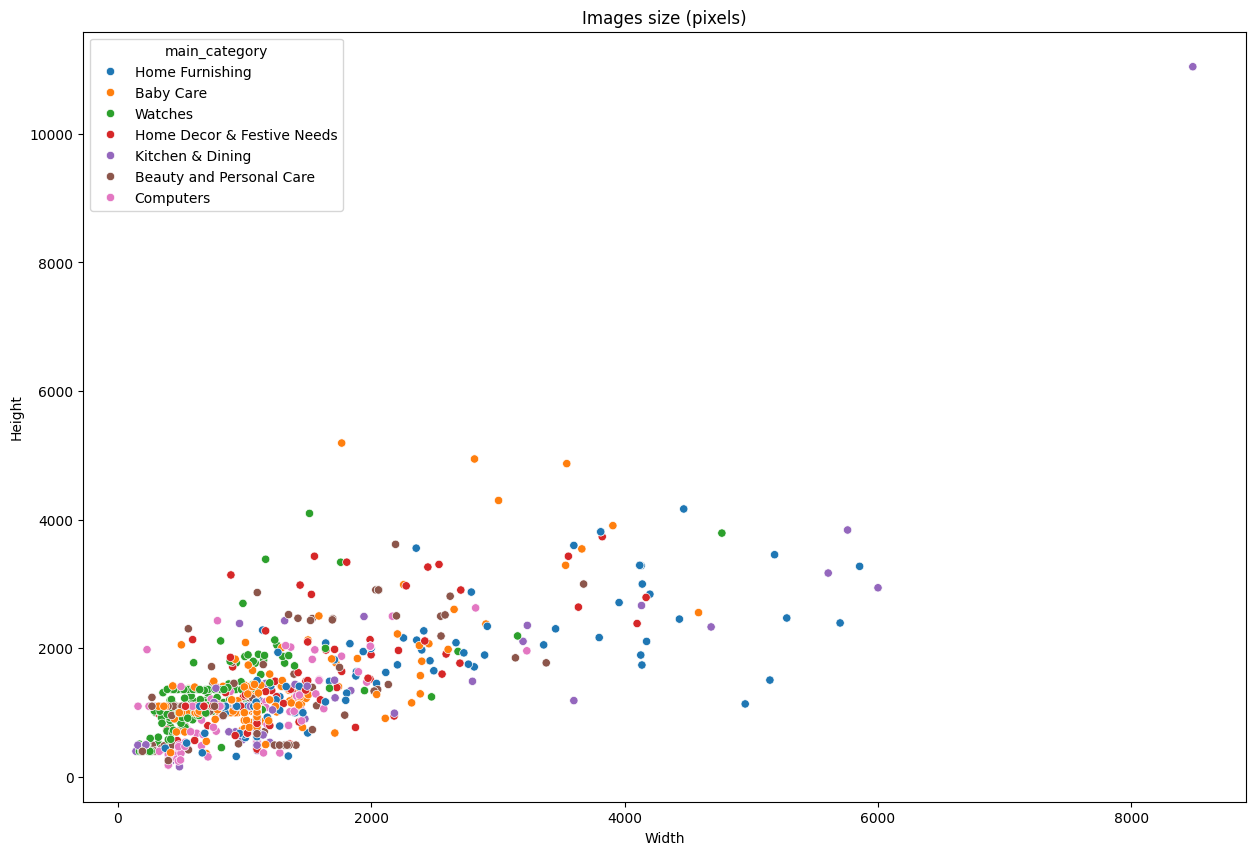

In [38]:
# Scatter plot of the witgh and length of the images
plt.figure(figsize=(15, 10))
sns.scatterplot(x='width', y='height', data=images_df, color=COLOR, hue='main_category')
plt.title('Images size (pixels)')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

Pictures are all in colors with high definition (mean of 1200 pixels). We observe an outlier for the category Kitchen and dining.

## Display few images

In [63]:
classes

['Home Furnishing',
 'Baby Care',
 'Watches',
 'Home Decor & Festive Needs',
 'Kitchen & Dining',
 'Beauty and Personal Care',
 'Computers']

# Features extraction

In [29]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from sklearn import manifold, cluster
from collections import Counter

In [189]:
results_comparison = pd.DataFrame(columns=['Algorithm', 'Method', 'ARI', 'Time'])

## Functions

### Images transformation

In [160]:
def resize_img(image: str, max_size: int, greyscale: bool=False) -> object:
    """Resize an image to a specific width and height. Change the image scale if needed.

    Args:
        image (str): the name of the image
        width (int): the width of the image (default: 300)
        height (int): the height of the image (default: 300)
        greyscale (bool): convert the image to greyscale (default: False)
    Returns:
        image (array): the resized image
    """
    # Calculate a resizing ratio to keep the original image aspect ratio
    ratio = max_size / max(image.shape[0], image.shape[1])
    width = int(image.shape[1] * ratio)
    height = int(image.shape[0] * ratio)
    try:
        image = cv2.resize(image, (width, height), interpolation=cv2.INTER_AREA)

        if greyscale:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Clean created variables
        del(ratio, height, width)

        return image
    except Exception as e:
        print(f'Error resizing image: {image}')
        print(f'Error: {e}')
        return None

In [207]:
def extract_features(image: str, algo: str) -> tuple:
    """Extract features from an image.

    Args:
        image (string): the image
        algo (string): the algorithm to use ('SIFT', 'ORB')
    Returns:
        tupe: the set of keypoints and descriptors
    """
    try:
        if algo == 'SIFT':
            # Instantiate the SIFT object
            algo_object = cv2.SIFT_create()
        elif algo == 'ORB':
            algo_object = cv2.ORB_create()
        keypoints , descriptors = algo_object.detectAndCompute(image, None)
    except Exception as e:
        print(f'Error reading image: {image}')
        print(f'Error: {e}')
    return keypoints, descriptors


In [77]:
def read_and_modify_image(image_path: str, resize: int=None, greyscale: bool=False) -> np.array:
    """Reads an image and modifies it if needed.

    Args:
        image_path (str): the path to the image
        resize (int, optional): the max height or width of the image. Defaults to None.
        greyscale (bool, optional): If change image to greyscale. Defaults to False.

    Returns:
        np.array: Image informations
    """
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    # Resize the image
    if resize:
        image = resize_img(image, resize)
    # Convert the image to greyscale
    if greyscale:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # equalize the histogram of the image
        # It is used to improve the contrast in the image
        # Enhance the intensity distribution of the image
        # Robust to lighting changes
        image = cv2.equalizeHist(image)
    return image

In [201]:
def get_descriptors(
    algo: str='SIFT',
    data: pd.DataFrame= images_df,
    path: str=path,
    resize: int=None,
    greyscale: bool=False
    ) -> list:
    """Save all the descriptors and display one result per category.

    Args:
        algo (str): the algorithm to use ('SIFT', 'ORB', 'SURF')
        data (pd.DataFrame): the dataframe containing the images (default: images_df)
        path (str): the path to the images (default: path)
        resize (int): limit the size of width or height in pixels (default: None)
        greyscale (bool): convert the image to greyscale (default: False)

    Returns:
        list: the list of all descriptors
    """
    start_time = time.time()
    images_descriptors = []
    images_labels = []

    data_copy = data.copy()
    for row in data_copy.itertuples():
        # Keep image index
        i = row.Index
        # read and transform image
        image = read_and_modify_image(path + row.image, resize, greyscale)

        _, descriptors = extract_features(image, algo)

        if descriptors is not None:
            images_descriptors.append(descriptors)
            images_labels.append(row.category_code)
        else:
            # drop the image if no descriptors
            data_copy = data_copy.drop(i)
            print(f'Dropped image: {row.image}')
            continue


    descriptors_per_image = [descriptor for descriptor in images_descriptors if descriptor is not None]
    print(f'Time taken: {time.time() - start_time:.2f}s')

    return descriptors_per_image,data_copy

In [44]:
def get_histogram(img_descriptors: list, model: MiniBatchKMeans, n_clusters: int) -> np.ndarray:
    """Extract the histogram of the descriptors.

    Args:
        descriptors (np.ndarray): the descriptors
        n_clusters (int): the number of clusters (default: 10)
    Returns:
        np.ndarray: the histogram of the descriptors
    """

    try:
        histogram = np.zeros(len(model.cluster_centers_))
        labels = model.predict(img_descriptors)
        descriptors_number = len(img_descriptors)
        if  descriptors_number == 0 : print('No descriptors for image')
        for label in labels:
            histogram[label] += 1 / descriptors_number
        return histogram
    except Exception as e:
        print('Error calculating histogram')
        print(f'Error: {e}')
        return None

In [45]:
def get_vbow_and_labels(X: np.array, k: int, all_descriptors: list):
    """Get the Visual Bag of Words

    Args:
        X (np.ndarray): the descriptors
        range_to_test (np.ndarray): the range of clusters to test
        categories (list): the list of descriptors

    Returns:
        np.ndarray: the visual bag of words
    """
    # Instantiate the KMeans object using minibatch to improve speed
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_

    # Create the visual bag of words
    visual_bag_of_words = []
    for desc in tqdm(all_descriptors):
        hist = get_histogram(desc, kmeans, k)
        visual_bag_of_words.append(hist)

    visual_bag_of_words = np.array(visual_bag_of_words)

    return visual_bag_of_words, labels

In [46]:
def clusters_range(X:np.array, categories: list=classes):
    """ Calculate the range of clusters to test

    Args:
        X (np.ndarray): desciptors

    Returns:
    """
    # Square root method (square root of the number of the number of descriptors)
    n_clusters_sqrt = int(np.sqrt(len(X)))

    # Multiply the number of classes method
    n_clusters_classes = len(categories) * 10

    range_to_test = np.linspace(n_clusters_classes, n_clusters_sqrt, 10).astype(int)

    print(f'Number of clusters to test: {len(range_to_test)}')

    return range_to_test

### Plot

In [202]:
def display_keypoints(algo: str='SIFT', resize: int=None, greyscale: bool=False):
    """Display keypoints and descriptors of few images for each category.

    Args:
        algo (str, optional): _description_. Defaults to 'SIFT'.
        resize (int, optional): _description_. Defaults to None.
        greyscale (bool, optional): _description_. Defaults to False.
    """
    categories = []
    while len(categories) < len(classes):
        for row in images_df.itertuples():
            category = row.main_category
            if category not in categories:
                image = read_and_modify_image(path + row.image, resize, greyscale)

                keypoints, descriptors = extract_features(image, algo)
                img_with_keypoints = cv2.drawKeypoints(image, keypoints, None)
                plt.figure(figsize=(5, 5))

                # display image with keypoints
                plt.subplot(2, 1, 1)
                plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
                plt.title(f'Category {category}')
                plt.axis('off')

                # display histogram
                plt.subplot(2, 1, 2)
                plt.hist(image.ravel(), 256, [0, 256])
                plt.title('Histogram')

                plt.tight_layout()
                plt.show()

                # Diplay number of keypoints and descriptors size
                print(f'Image: {row.image}')
                print(f'Number of keypoints: {len(keypoints)}')
                print(f"Descriptors size: {descriptors.shape if descriptors is not None else (0, 0)}")

                categories.append(category)

In [152]:
def plot_tsne(best_pca_vector, best_ari, best_labels, real_labels):
    """Plot the t-SNE representation of the data.

    Args:
        best_pca_vector (np.ndarray): the best PCA vector
        best_ari (float): the best ARI score
        best_labels (np.ndarray): the best labels
        real_labels (np.ndarray):
    """
    print('Diplay the T-SNE plot for the best result...')

    tsne = manifold.TSNE(n_components=2, perplexity=30, init='random', random_state=42)
    X_tsne = tsne.fit_transform(best_pca_vector)
    print(f'ARI: {best_ari:.2f}, Vector dimension: {best_pca_vector.shape[1]}')
    fig = plt.figure(figsize=(13, 5), tight_layout=True)

    # TODO link real labels to categories
    # mapped_labels = [categories_map[code] for code in real_labels]

    # Save results in a dataframe
    data = {
        'tsne1': X_tsne[:, 0],
        'tsne2': X_tsne[:, 1],
        'class': real_labels,
        'clusters': best_labels
        }
    df_tsne = pd.DataFrame(data)
    print(df_tsne.shape)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15))
    fig.suptitle('t-SNE representation of the data')

    sns.scatterplot(x='tsne1', y='tsne2', data=df_tsne, hue='class', palette='tab10', ax=ax1)
    ax1.legend(title='Categories', bbox_to_anchor=(1, 0.5), loc='center left')
    ax1.set_xlabel('t-SNE 1')
    ax1.set_ylabel('t-SNE 2')
    ax1.set_title('Real labels')

    sns.scatterplot(x='tsne1', y='tsne2', data=df_tsne, hue='clusters', palette='tab10', ax=ax2)
    ax2.legend(title='Clusters', bbox_to_anchor=(1, 0.5), loc='center left')
    ax2.set_xlabel('t-SNE 1')
    ax2.set_ylabel('t-SNE 2')
    ax2.set_title('Predicted labels')

    plt.show()

    return df_tsne

In [141]:
def compute_ari(X, real_labels: pd.Series):
    """Compute the Adjusted Rand Index.

    Args:
        X (np.ndarray):
        real_labels (pd.Series): the real categories

    Returns:
        float: the ARI score
    """
    print('Starting dimensionality reduction...')
    pca = PCA(n_components=0.99, random_state=42)
    reduced_data = pca.fit_transform(X)

    kmeans = KMeans(n_clusters=len(classes), random_state=42)
    kmeans.fit(reduced_data)

    # TODO Map labels to original categories : get the keys from the dict

    # Get ari score
    ari = adjusted_rand_score(real_labels, kmeans.labels_)

    return ari, reduced_data, kmeans.labels_

## SIFT & Visual Bag of Words

Interesting source on [youtube](https://www.youtube.com/watch?v=4AvTMVD9ig0)

Scale-Invariant Feature Transform is a way for describing a local area in an image through a **feature vector**.

The goal is to reduce an image content into a set of locally distinct points called **descriptors**, that we will try to find in other images.

When a keypoint is found, we look in its neighborhood for intensity changes, gradient changes value of this area in order to describe it into a descriptor vector. So the descriptor is the vector discribing the surrondings of that point.

When comparing several images with same keypoints, it is possible to compare descriptors and make data associations between those images.

The keypoints are found using a **difference of Gaussian approach** which consist to take an image and blur it using a Gaussian blur at different magnetude. Then we substract the images from each other. After stacking thoses differences, we try to spot extreme points ==> Keypoints. It is also possible to apply different scales to the image to find these extreme points.

After finding the keypoint, we need to compute the descriptor by looking the neighborhood of the KP by breaking it in small parts and compute the gradient of these small areas. Gradient of local area are then collected into histograms to visualize how often certain gradient occur, what is their magnitude.

Steps :
- Get the images features (keypoints and descriptors)
- Define a range of number of clusters of descriptors to test
- Dimensionality reduction
- Predict clusters on reduced dimensionality

### function

In [187]:
def compare_and_get_best_clusters(
    descriptors: list,
    real_labels: np.array,
    method: str,
    algo: str='SIFT',
    results_comparison: pd.DataFrame=results_comparison
    ):
    """Plot and compare the 2D representation of the data.

    Args:
        descriptors (list): the list of descriptors
        real_labels (np.array): the real labels for each image
        method (str): the method used to find the images features
        classes (list): the classes
        algo (str): the algorithm used to find the clusters
        results_comparison (pd.DataFrame): the results of the comparison

    Returns:
        np.array: the best pca vector
        np.array: the best labels
    """
    all_descriptors = np.vstack(descriptors)
    print(f'All descriptors shape: {all_descriptors.shape}')

    k_range = clusters_range(all_descriptors)
    print(f'Full resolution clusters range: {k_range}')

    ari_scores = []
    best_pca_vector = None
    best_labels = None
    best_ari = -1
    i = 1

    for k in k_range:
        print(f"Test {i} - Creating {k} descriptors clusters...")
        start_time = time.time()
        visual_bag_of_words, _ = get_vbow_and_labels(all_descriptors, k, descriptors)
        print(f'Visual bag of words dimension: {visual_bag_of_words.shape}')

        ari, reduced_bow, predicted_labels = compute_ari(visual_bag_of_words, real_labels)
        ari_scores.append((reduced_bow.shape[1], ari))

        # Get best ari score
        if ari > best_ari:
            best_ari = ari
            best_pca_vector = reduced_bow
            best_labels = predicted_labels
            best_time = time.time() - start_time

        i += 1
        print(f'Time taken: {time.time() - start_time:.2f}s')

    print('scores:')
    print(sorted(ari_scores, key=lambda x: x[1], reverse=True))

    # Create a new row to store the method and the best ari score and save it to result dataframe
    new_row = pd.DataFrame([{'Algorithm': algo, 'Method': method, 'ARI': best_ari, 'Time': best_time}])
    results_comparison = pd.concat([results_comparison, new_row], ignore_index=True)


    return best_ari, best_pca_vector, best_labels, results_comparison

### Full resolution

/var/folders/4f/ml64c07d1zsg_jvvydhyltjr0000gn/T/ipykernel_70360/2456869983.py:27: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(image.ravel(), 256, [0, 256])


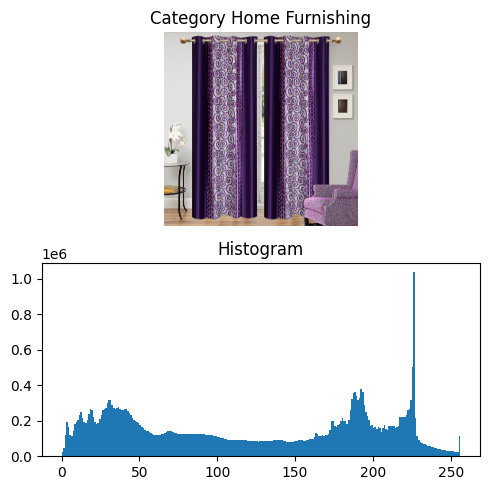

Image: 55b85ea15a1536d46b7190ad6fff8ce7.jpg
Number of keypoints: 93042
Descriptors size: (93042, 128)


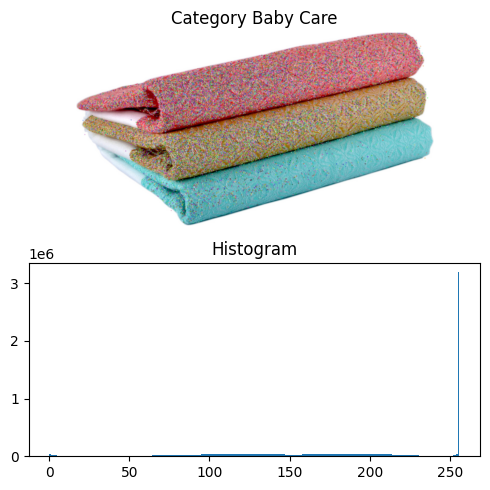

Image: 7b72c92c2f6c40268628ec5f14c6d590.jpg
Number of keypoints: 25446
Descriptors size: (25446, 128)


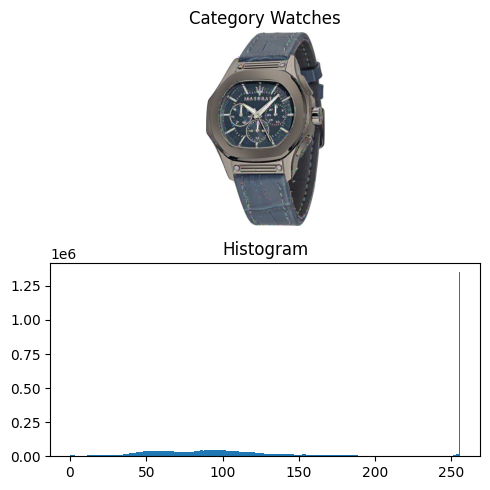

Image: 893aa5ed55f7cff2eccea7758d7a86bd.jpg
Number of keypoints: 4493
Descriptors size: (4493, 128)


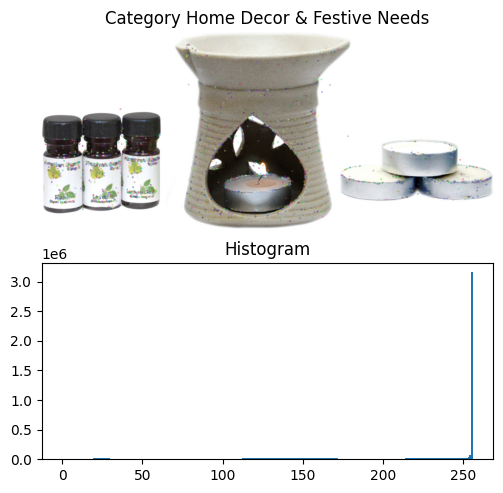

Image: f0938b0d88eac91deee6d5add54097d3.jpg
Number of keypoints: 2104
Descriptors size: (2104, 128)


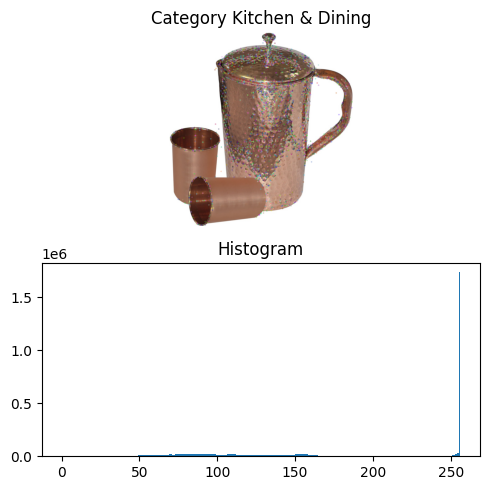

Image: e9420e9483f16db81c64dddf99f34841.jpg
Number of keypoints: 4061
Descriptors size: (4061, 128)


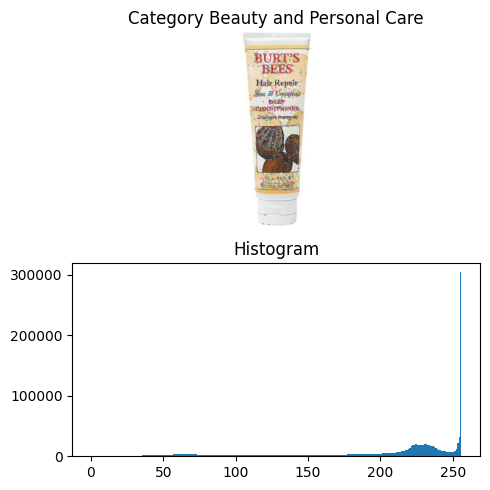

Image: 2d50e4c6ccf8befe9335ac8f97a11712.jpg
Number of keypoints: 2176
Descriptors size: (2176, 128)


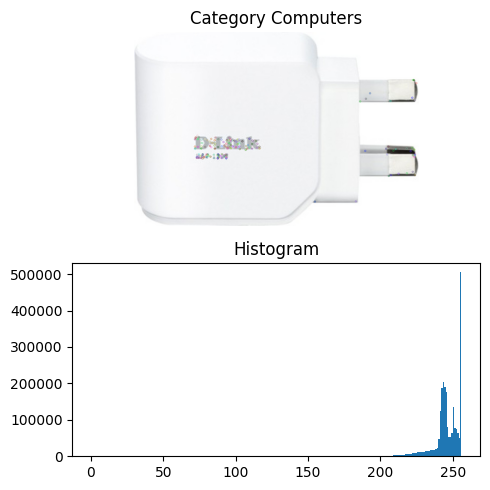

Image: d1899ab1d5c79ddaa311bc9f04d198ed.jpg
Number of keypoints: 202
Descriptors size: (202, 128)
Dropped image: 9743e6d1c9f3180483825fe4d2e97836.jpg
Time taken: 138.08s


In [192]:
display_keypoints()
full_resolution_descriptors, df_image_copy = get_descriptors()

In [193]:
best_ari, best_pca_vector, best_labels, results_comparison = compare_and_get_best_clusters(full_resolution_descriptors, df_image_copy['category_code'], method='Full resolution', algo='SIFT', results_comparison=results_comparison)

All descriptors shape: (5977631, 128)
Number of clusters to test: 10
Full resolution clusters range: [  70  333  597  861 1125 1388 1652 1916 2180 2444]
Test 1 - Creating 70 descriptors clusters...


100%|██████████| 1049/1049 [00:01<00:00, 767.61it/s]


Visual bag of words dimension: (1049, 70)
Starting dimensionality reduction...
Time taken: 6.20s
Test 2 - Creating 333 descriptors clusters...


100%|██████████| 1049/1049 [00:02<00:00, 434.62it/s]


Visual bag of words dimension: (1049, 333)
Starting dimensionality reduction...
Time taken: 13.27s
Test 3 - Creating 597 descriptors clusters...


100%|██████████| 1049/1049 [00:03<00:00, 312.47it/s]


Visual bag of words dimension: (1049, 597)
Starting dimensionality reduction...
Time taken: 18.82s
Test 4 - Creating 861 descriptors clusters...


100%|██████████| 1049/1049 [00:04<00:00, 252.97it/s]


Visual bag of words dimension: (1049, 861)
Starting dimensionality reduction...
Time taken: 24.66s
Test 5 - Creating 1125 descriptors clusters...


100%|██████████| 1049/1049 [00:05<00:00, 208.83it/s]


Visual bag of words dimension: (1049, 1125)
Starting dimensionality reduction...
Time taken: 29.49s
Test 6 - Creating 1388 descriptors clusters...


100%|██████████| 1049/1049 [00:05<00:00, 175.70it/s]


Visual bag of words dimension: (1049, 1388)
Starting dimensionality reduction...
Time taken: 34.37s
Test 7 - Creating 1652 descriptors clusters...


100%|██████████| 1049/1049 [00:06<00:00, 155.57it/s]


Visual bag of words dimension: (1049, 1652)
Starting dimensionality reduction...
Time taken: 39.35s
Test 8 - Creating 1916 descriptors clusters...


100%|██████████| 1049/1049 [00:07<00:00, 141.90it/s]


Visual bag of words dimension: (1049, 1916)
Starting dimensionality reduction...
Time taken: 44.16s
Test 9 - Creating 2180 descriptors clusters...


100%|██████████| 1049/1049 [00:08<00:00, 129.54it/s]


Visual bag of words dimension: (1049, 2180)
Starting dimensionality reduction...
Time taken: 48.47s
Test 10 - Creating 2444 descriptors clusters...


100%|██████████| 1049/1049 [00:09<00:00, 114.65it/s]


Visual bag of words dimension: (1049, 2444)
Starting dimensionality reduction...
Time taken: 53.26s
scores:
[(52, 0.04831155831578978), (203, 0.04514722971043963), (319, 0.038741023888361925), (414, 0.03391890755260611), (632, 0.026223416981609314), (484, 0.023607943477581154), (535, 0.023154736669436272), (649, 0.019736185191181917), (580, 0.016382328615353478), (602, 0.0016337004550079802)]


/var/folders/4f/ml64c07d1zsg_jvvydhyltjr0000gn/T/ipykernel_70360/2086188719.py:58: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_comparison = pd.concat([results_comparison, new_row], ignore_index=True)


Diplay the T-SNE plot for the best result...
ARI: 0.05, Vector dimension: 52
(1049, 4)


<Figure size 1300x500 with 0 Axes>

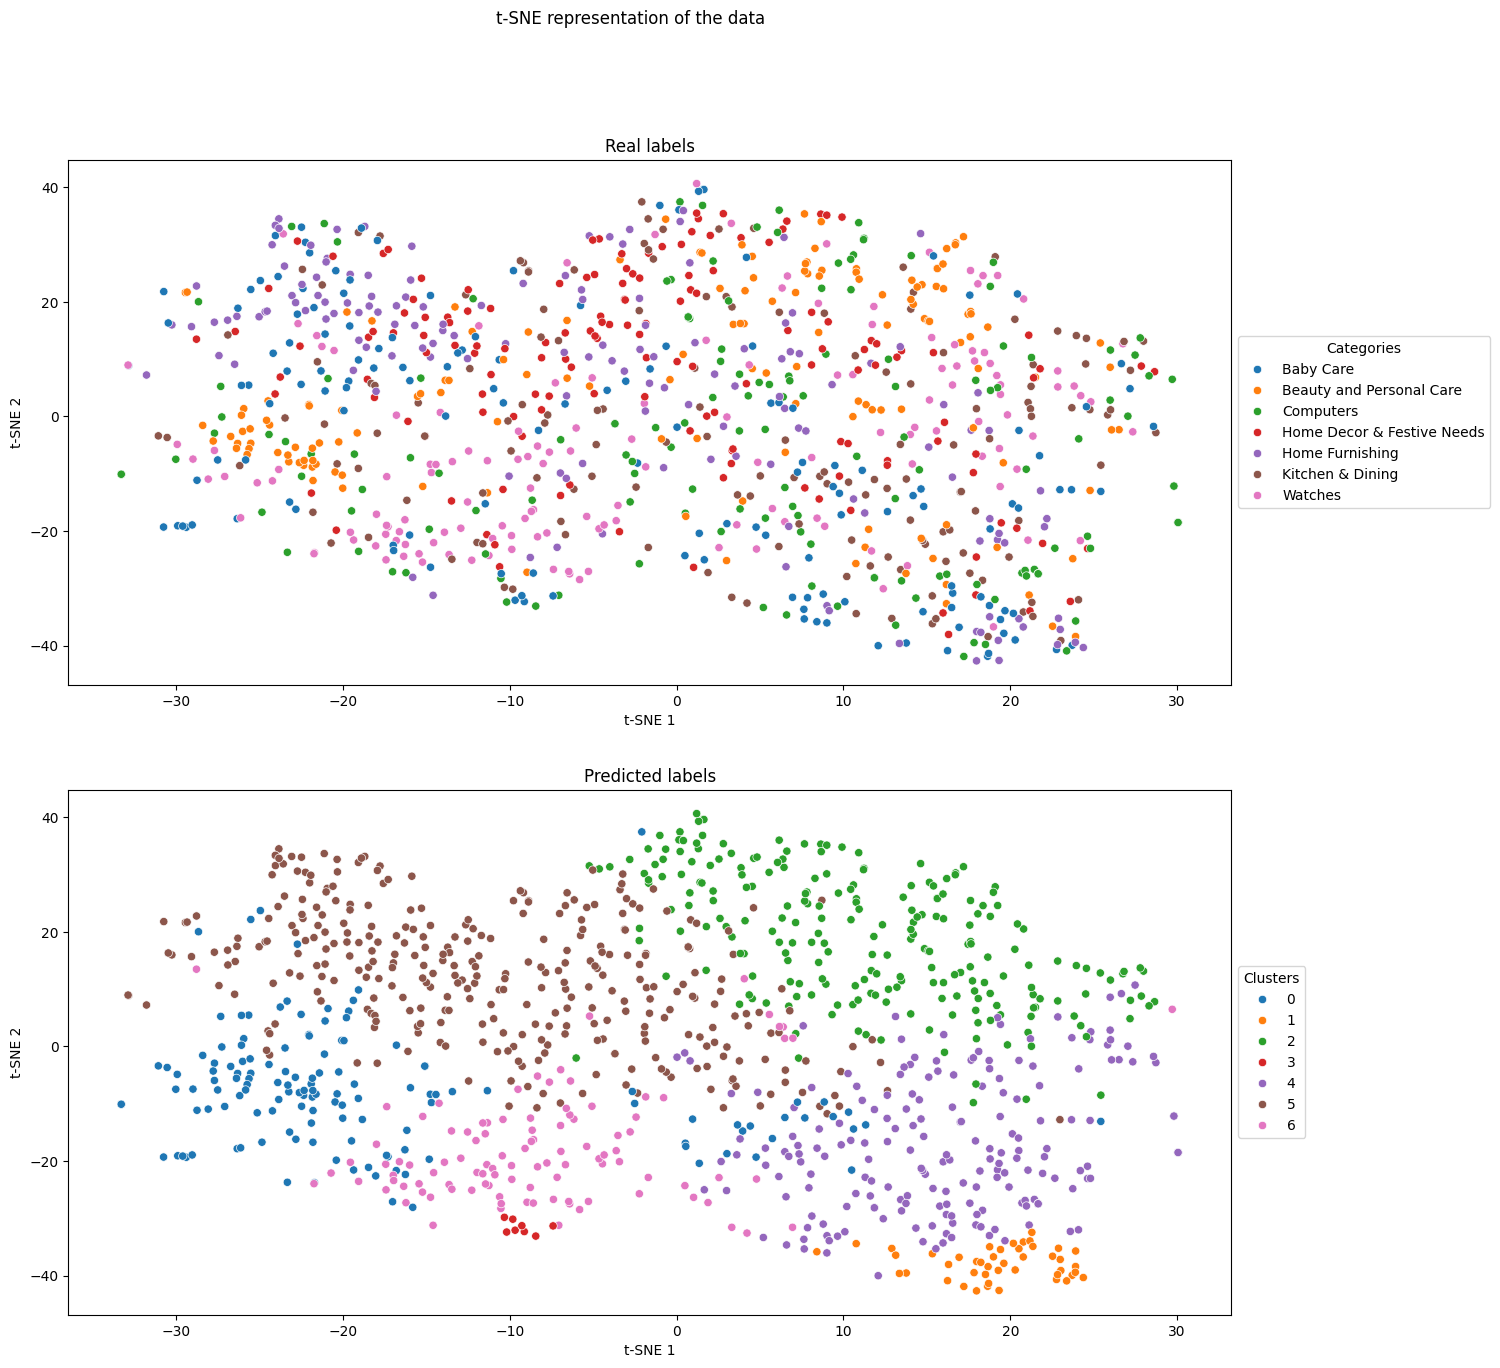

In [194]:
df_tsne_full_reso = plot_tsne(best_pca_vector=best_pca_vector, best_ari=best_ari, best_labels=best_labels, real_labels=df_image_copy['main_category'])

### Resized image

/var/folders/4f/ml64c07d1zsg_jvvydhyltjr0000gn/T/ipykernel_70360/2456869983.py:27: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(image.ravel(), 256, [0, 256])


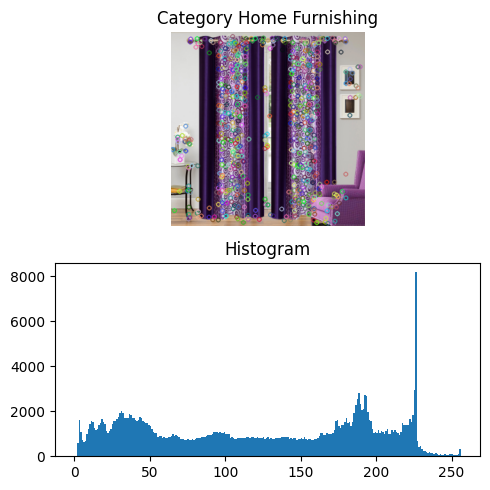

Image: 55b85ea15a1536d46b7190ad6fff8ce7.jpg
Number of keypoints: 694
Descriptors size: (694, 128)


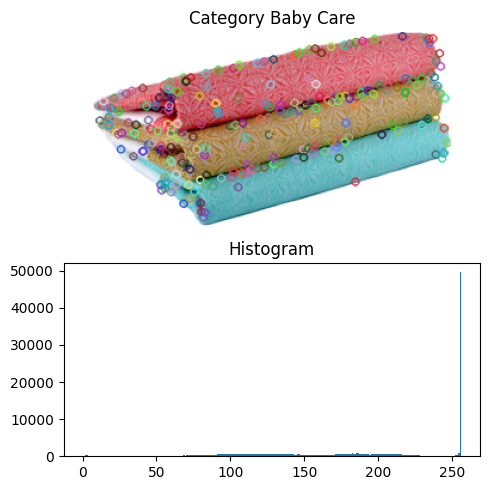

Image: 7b72c92c2f6c40268628ec5f14c6d590.jpg
Number of keypoints: 252
Descriptors size: (252, 128)


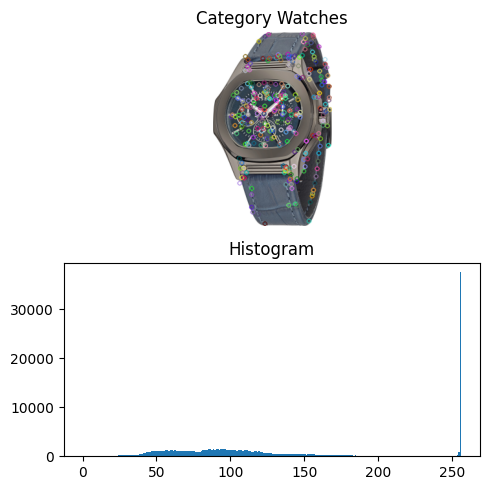

Image: 893aa5ed55f7cff2eccea7758d7a86bd.jpg
Number of keypoints: 346
Descriptors size: (346, 128)


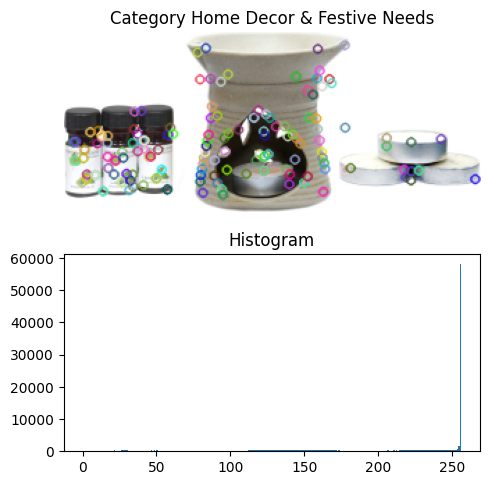

Image: f0938b0d88eac91deee6d5add54097d3.jpg
Number of keypoints: 147
Descriptors size: (147, 128)


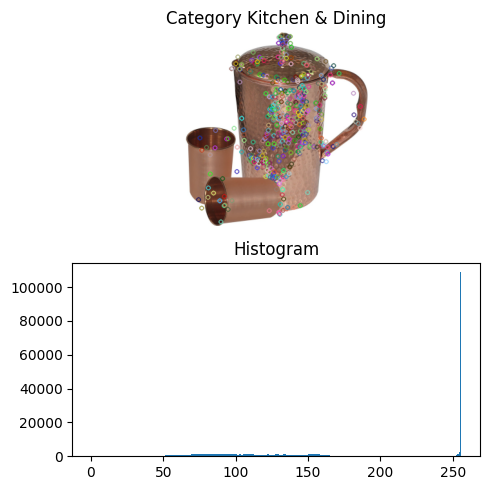

Image: e9420e9483f16db81c64dddf99f34841.jpg
Number of keypoints: 455
Descriptors size: (455, 128)


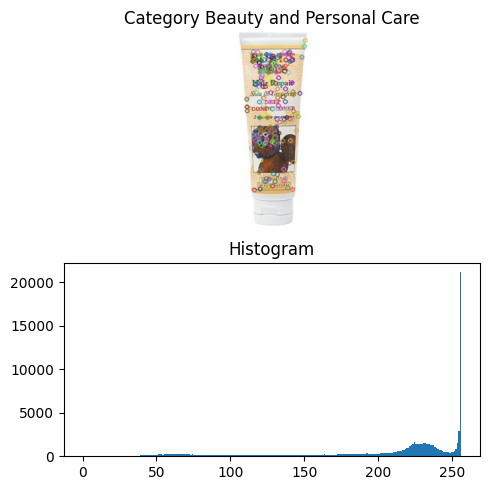

Image: 2d50e4c6ccf8befe9335ac8f97a11712.jpg
Number of keypoints: 254
Descriptors size: (254, 128)


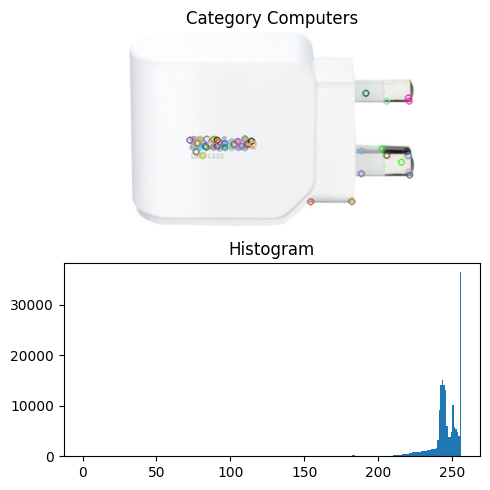

Image: d1899ab1d5c79ddaa311bc9f04d198ed.jpg
Number of keypoints: 61
Descriptors size: (61, 128)
Dropped image: 9743e6d1c9f3180483825fe4d2e97836.jpg
Dropped image: c8e2c85eccdc9db55eeb2231385e4f1c.jpg
Time taken: 18.45s


In [195]:
# Resizing the images
display_keypoints(resize=300)
resized_descriptors, df_image_copy = get_descriptors(data=images_df, resize=300)

All descriptors shape: (333177, 128)
Number of clusters to test: 10
Full resolution clusters range: [ 70 126 182 239 295 351 408 464 520 577]
Test 1 - Creating 70 descriptors clusters...


100%|██████████| 1048/1048 [00:00<00:00, 5766.33it/s]


Visual bag of words dimension: (1048, 70)
Starting dimensionality reduction...
Time taken: 0.87s
Test 2 - Creating 126 descriptors clusters...


100%|██████████| 1048/1048 [00:00<00:00, 4697.55it/s]


Visual bag of words dimension: (1048, 126)
Starting dimensionality reduction...
Time taken: 1.17s
Test 3 - Creating 182 descriptors clusters...


100%|██████████| 1048/1048 [00:00<00:00, 3925.84it/s]


Visual bag of words dimension: (1048, 182)
Starting dimensionality reduction...
Time taken: 1.52s
Test 4 - Creating 239 descriptors clusters...


100%|██████████| 1048/1048 [00:00<00:00, 3327.51it/s]


Visual bag of words dimension: (1048, 239)
Starting dimensionality reduction...
Time taken: 1.62s
Test 5 - Creating 295 descriptors clusters...


100%|██████████| 1048/1048 [00:00<00:00, 2904.34it/s]


Visual bag of words dimension: (1048, 295)
Starting dimensionality reduction...
Time taken: 1.74s
Test 6 - Creating 351 descriptors clusters...


100%|██████████| 1048/1048 [00:00<00:00, 2454.43it/s]


Visual bag of words dimension: (1048, 351)
Starting dimensionality reduction...
Time taken: 2.13s
Test 7 - Creating 408 descriptors clusters...


100%|██████████| 1048/1048 [00:00<00:00, 2382.74it/s]


Visual bag of words dimension: (1048, 408)
Starting dimensionality reduction...
Time taken: 2.36s
Test 8 - Creating 464 descriptors clusters...


100%|██████████| 1048/1048 [00:00<00:00, 2228.62it/s]


Visual bag of words dimension: (1048, 464)
Starting dimensionality reduction...
Time taken: 2.44s
Test 9 - Creating 520 descriptors clusters...


100%|██████████| 1048/1048 [00:00<00:00, 2027.90it/s]


Visual bag of words dimension: (1048, 520)
Starting dimensionality reduction...
Time taken: 2.47s
Test 10 - Creating 577 descriptors clusters...


100%|██████████| 1048/1048 [00:00<00:00, 1838.22it/s]


Visual bag of words dimension: (1048, 577)
Starting dimensionality reduction...
Time taken: 2.89s
scores:
[(374, 0.034079669831986015), (160, 0.023024509203234404), (63, 0.022934338960927877), (111, 0.021383852551075937), (339, 0.019538984425895443), (294, 0.01943815765232777), (448, 0.019137657793090283), (411, 0.012956195915503083), (250, 0.012204567413141002), (207, 0.011336410454017551)]
Diplay the T-SNE plot for the best result...
ARI: 0.03, Vector dimension: 374
(1048, 4)


<Figure size 1300x500 with 0 Axes>

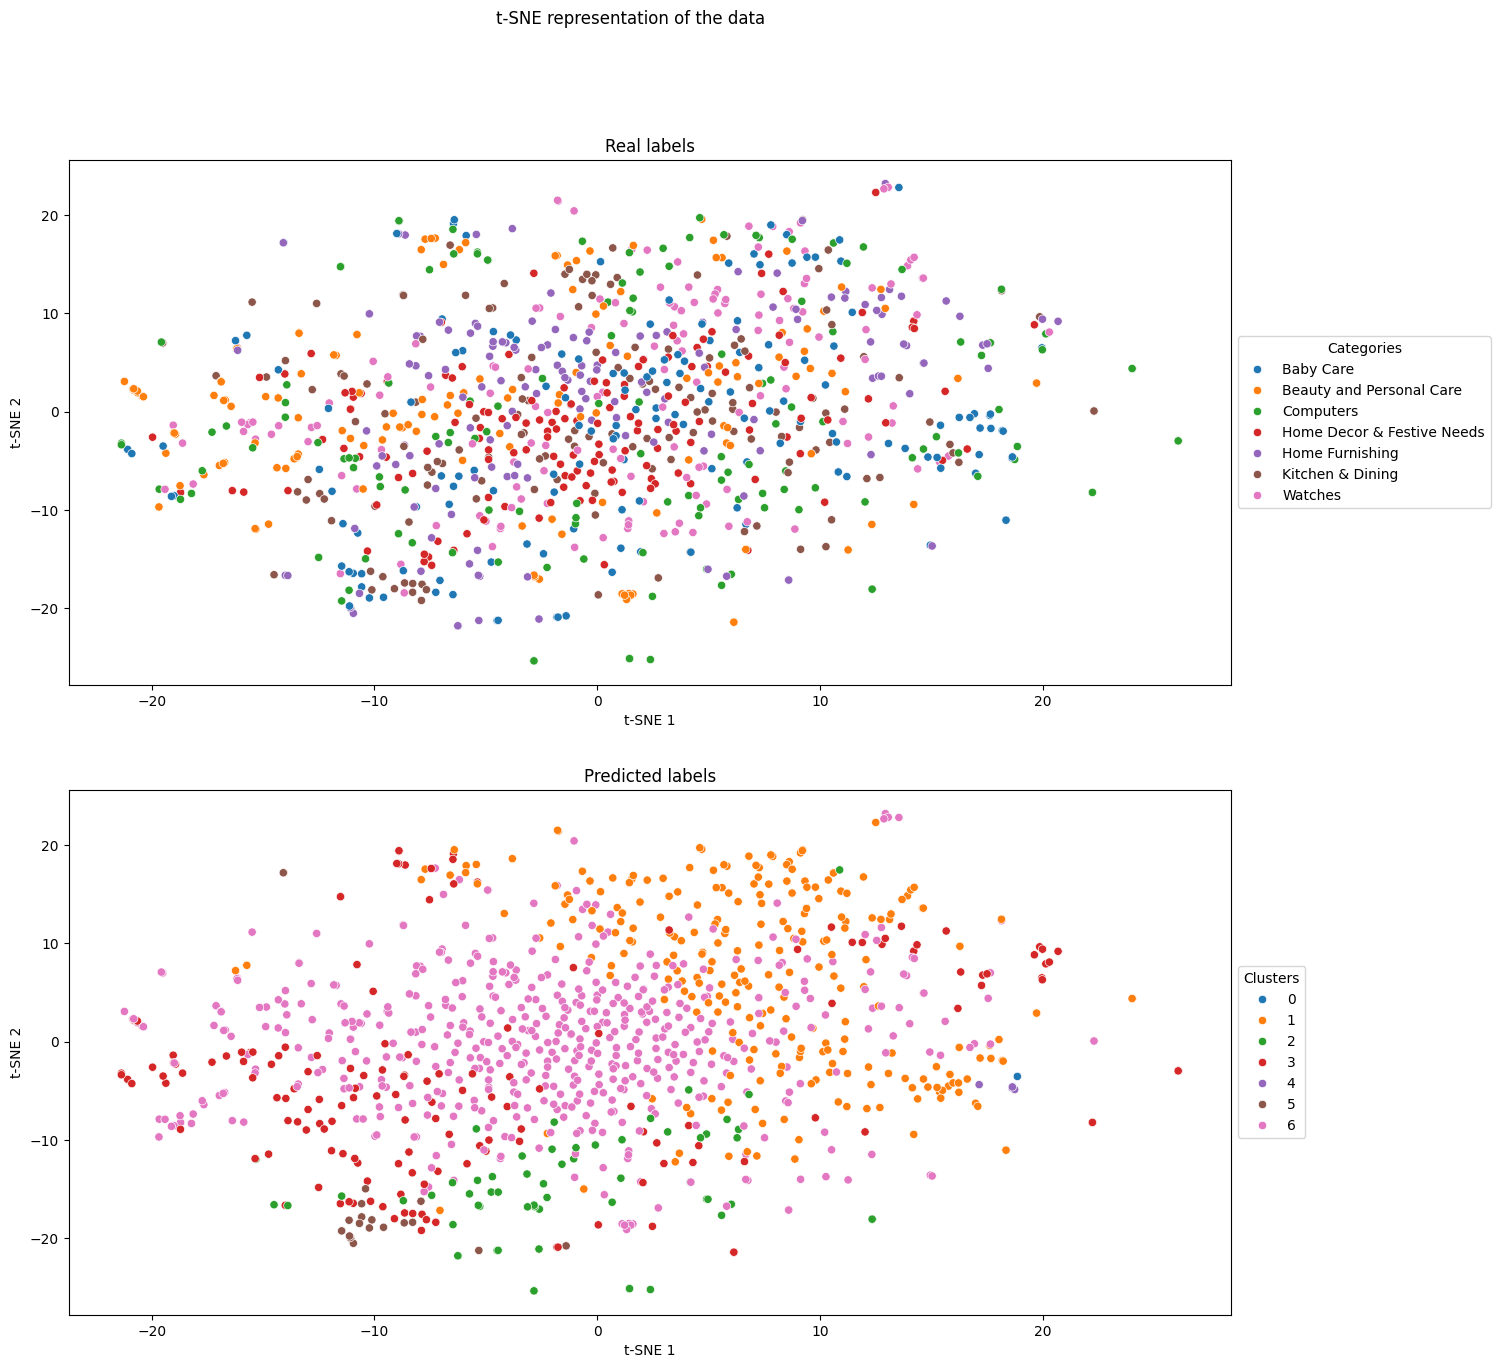

In [196]:
best_ari, best_pca_vector, best_labels, results_comparison = compare_and_get_best_clusters(resized_descriptors, df_image_copy['category_code'],method='resizing_img', results_comparison=results_comparison)
df_tsne_resized = plot_tsne(best_pca_vector=best_pca_vector, best_ari=best_ari, best_labels=best_labels, real_labels=df_image_copy['main_category'])

### Greyscale

/var/folders/4f/ml64c07d1zsg_jvvydhyltjr0000gn/T/ipykernel_70360/2456869983.py:27: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(image.ravel(), 256, [0, 256])


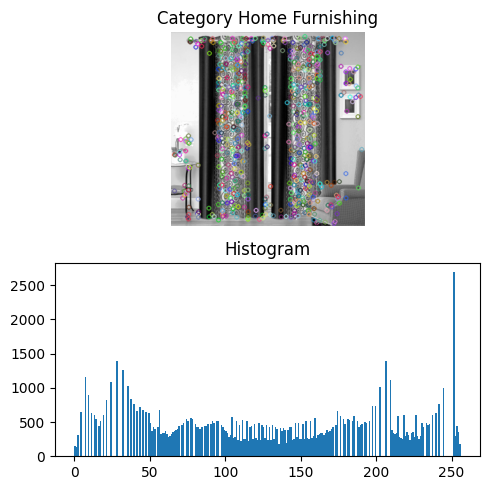

Image: 55b85ea15a1536d46b7190ad6fff8ce7.jpg
Number of keypoints: 683
Descriptors size: (683, 128)


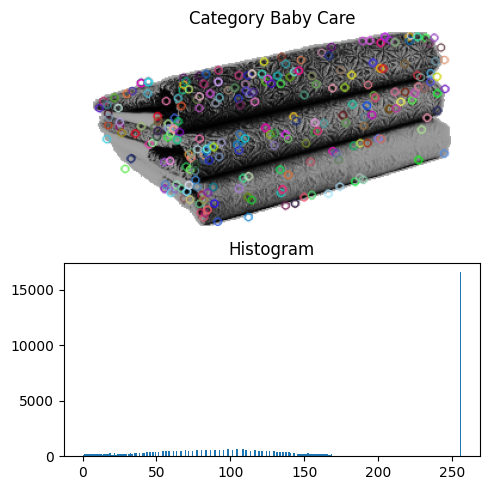

Image: 7b72c92c2f6c40268628ec5f14c6d590.jpg
Number of keypoints: 274
Descriptors size: (274, 128)


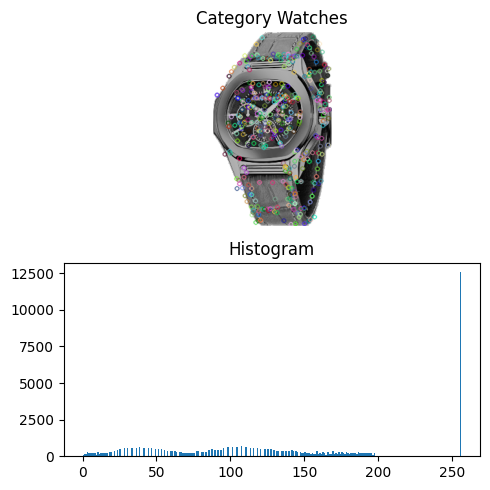

Image: 893aa5ed55f7cff2eccea7758d7a86bd.jpg
Number of keypoints: 456
Descriptors size: (456, 128)


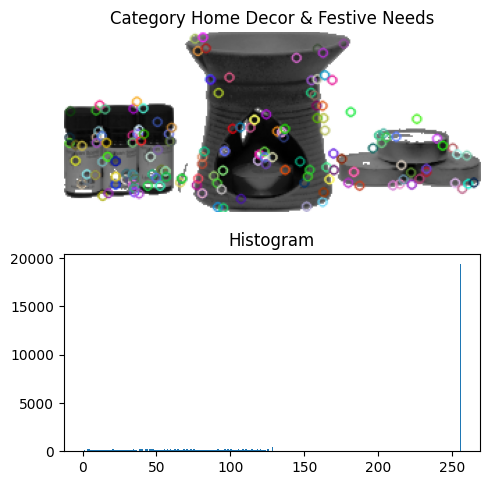

Image: f0938b0d88eac91deee6d5add54097d3.jpg
Number of keypoints: 174
Descriptors size: (174, 128)


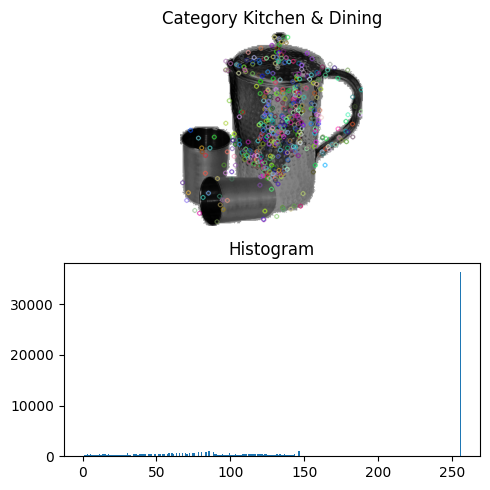

Image: e9420e9483f16db81c64dddf99f34841.jpg
Number of keypoints: 510
Descriptors size: (510, 128)


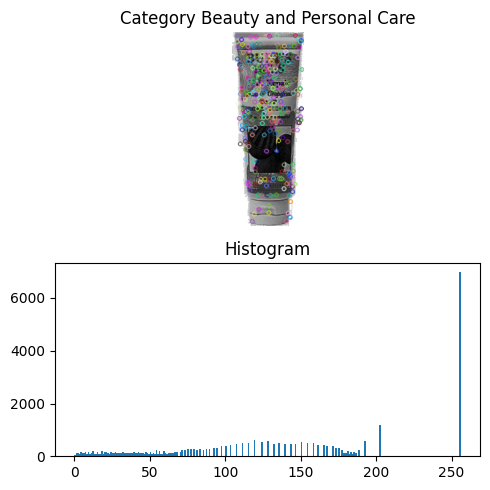

Image: 2d50e4c6ccf8befe9335ac8f97a11712.jpg
Number of keypoints: 350
Descriptors size: (350, 128)


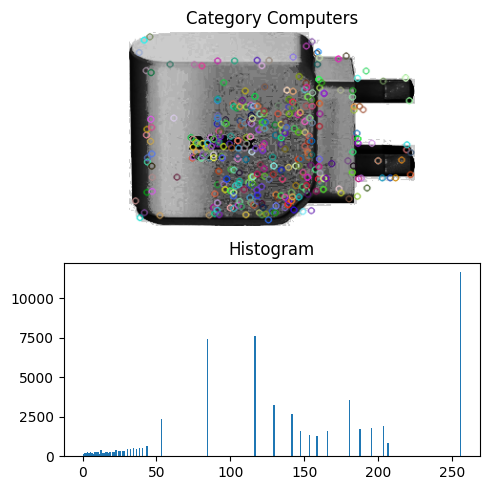

Image: d1899ab1d5c79ddaa311bc9f04d198ed.jpg
Number of keypoints: 413
Descriptors size: (413, 128)
Time taken: 18.87s
Number of descriptors: 1050


In [197]:
display_keypoints(greyscale=True, resize=300)
greyscale_descriptors, df_image_copy = get_descriptors(resize=300, greyscale=True)
print(f'Number of descriptors: {len(greyscale_descriptors)}')

All descriptors shape: (444313, 128)
Number of clusters to test: 10
Full resolution clusters range: [ 70 136 202 268 334 401 467 533 599 666]
Test 1 - Creating 70 descriptors clusters...


100%|██████████| 1050/1050 [00:00<00:00, 4693.03it/s]


Visual bag of words dimension: (1050, 70)
Starting dimensionality reduction...
Time taken: 1.07s
Test 2 - Creating 136 descriptors clusters...


100%|██████████| 1050/1050 [00:00<00:00, 3827.03it/s]


Visual bag of words dimension: (1050, 136)
Starting dimensionality reduction...
Time taken: 1.36s
Test 3 - Creating 202 descriptors clusters...


100%|██████████| 1050/1050 [00:00<00:00, 3047.12it/s]


Visual bag of words dimension: (1050, 202)
Starting dimensionality reduction...
Time taken: 1.71s
Test 4 - Creating 268 descriptors clusters...


100%|██████████| 1050/1050 [00:00<00:00, 2649.67it/s]


Visual bag of words dimension: (1050, 268)
Starting dimensionality reduction...
Time taken: 1.86s
Test 5 - Creating 334 descriptors clusters...


100%|██████████| 1050/1050 [00:00<00:00, 2253.57it/s]


Visual bag of words dimension: (1050, 334)
Starting dimensionality reduction...
Time taken: 2.31s
Test 6 - Creating 401 descriptors clusters...


100%|██████████| 1050/1050 [00:00<00:00, 2007.91it/s]


Visual bag of words dimension: (1050, 401)
Starting dimensionality reduction...
Time taken: 2.47s
Test 7 - Creating 467 descriptors clusters...


100%|██████████| 1050/1050 [00:00<00:00, 1824.07it/s]


Visual bag of words dimension: (1050, 467)
Starting dimensionality reduction...
Time taken: 2.94s
Test 8 - Creating 533 descriptors clusters...


100%|██████████| 1050/1050 [00:00<00:00, 1660.05it/s]


Visual bag of words dimension: (1050, 533)
Starting dimensionality reduction...
Time taken: 2.78s
Test 9 - Creating 599 descriptors clusters...


100%|██████████| 1050/1050 [00:00<00:00, 1494.80it/s]


Visual bag of words dimension: (1050, 599)
Starting dimensionality reduction...
Time taken: 3.09s
Test 10 - Creating 666 descriptors clusters...


100%|██████████| 1050/1050 [00:00<00:00, 1433.36it/s]


Visual bag of words dimension: (1050, 666)
Starting dimensionality reduction...
Time taken: 3.47s
scores:
[(121, 0.05183654874646936), (233, 0.04122755089653968), (177, 0.03662399990178722), (512, 0.03511741774043149), (284, 0.03278385953068069), (63, 0.030625818127709863), (387, 0.02921669908655623), (474, 0.028587027594658334), (433, 0.025488490593140116), (335, 0.02162087797926082)]
Diplay the T-SNE plot for the best result...
ARI: 0.05, Vector dimension: 121
(1050, 4)


<Figure size 1300x500 with 0 Axes>

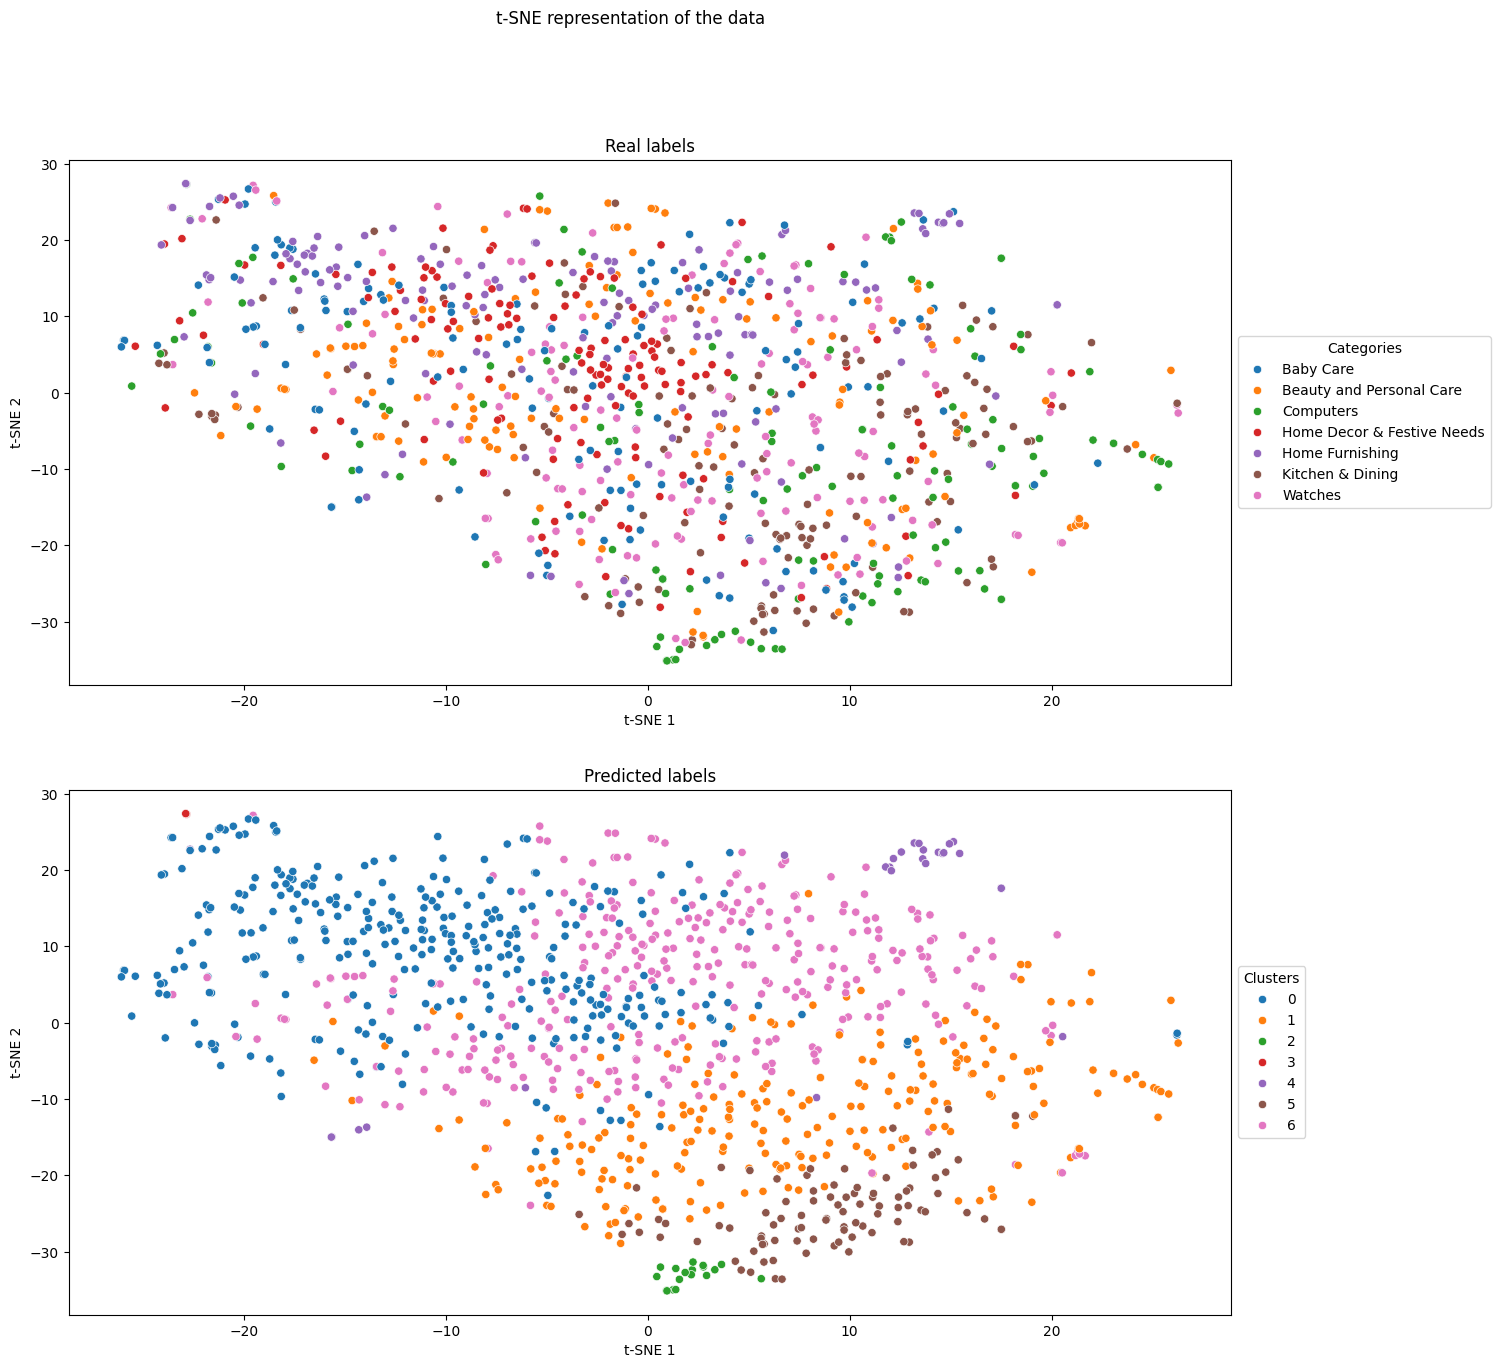

In [198]:
best_ari, best_pca_vector, best_labels, results_comparison = compare_and_get_best_clusters(greyscale_descriptors, df_image_copy['category_code'], method='greyscale', results_comparison=results_comparison)
df_tsne_grey = plot_tsne(best_pca_vector=best_pca_vector, best_ari=best_ari, best_labels=best_labels, real_labels=df_image_copy['main_category'])

In [199]:
display(results_comparison)

Algorithm           Method       ARI      Time
0      SIFT  Full resolution  0.048312  6.197920
1      SIFT     resizing_img  0.034080  2.442755
2      SIFT        greyscale  0.051837  1.361575

## ORB

Oriented FAST and Rotated Brief detects keypoints of an image.It combines FAST detectors (Features from Accelerated Segment Test) and BRIEF descriptors (Binary Robust Independent Elementary Features) and adds an invariance to the rotation.

FAST is fast to detect images keypoints.

BRIEF helps to describe the detected keypoints.

It is not sensitive to rotation but a bit more to scales.

/var/folders/4f/ml64c07d1zsg_jvvydhyltjr0000gn/T/ipykernel_70360/1338269889.py:28: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(image.ravel(), 256, [0, 256])


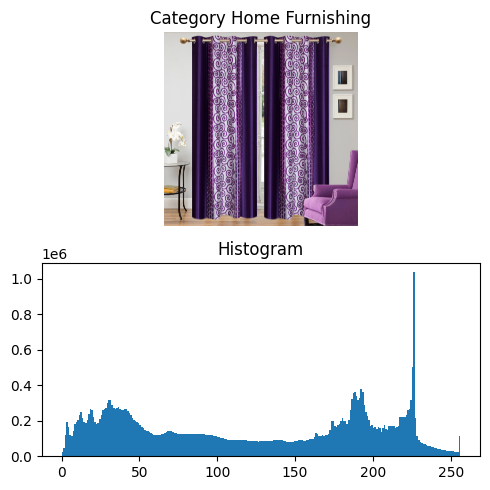

Image: 55b85ea15a1536d46b7190ad6fff8ce7.jpg
Number of keypoints: 500
Descriptors size: (500, 32)


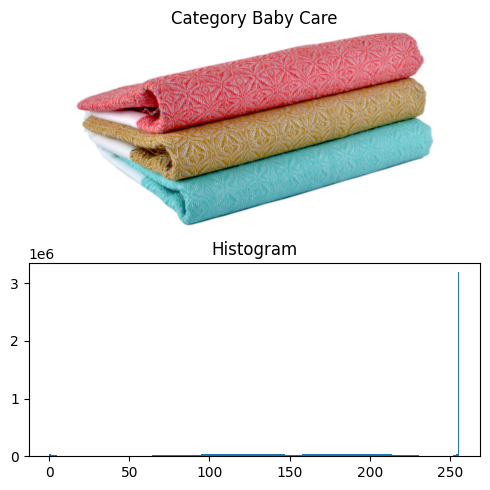

Image: 7b72c92c2f6c40268628ec5f14c6d590.jpg
Number of keypoints: 500
Descriptors size: (500, 32)


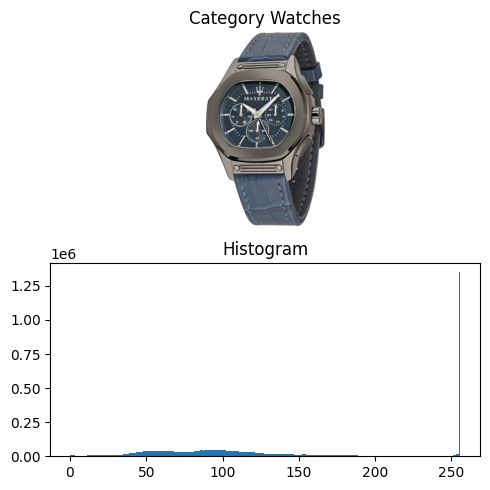

Image: 893aa5ed55f7cff2eccea7758d7a86bd.jpg
Number of keypoints: 500
Descriptors size: (500, 32)


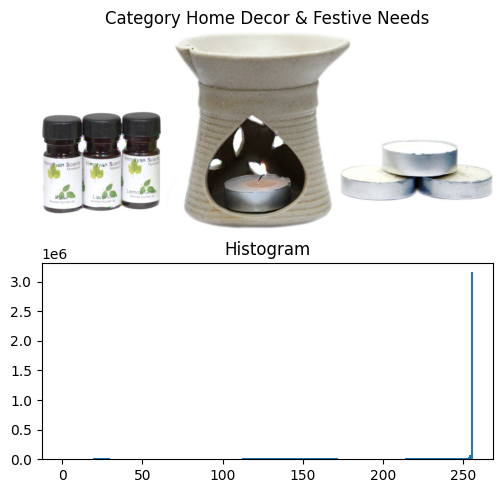

Image: f0938b0d88eac91deee6d5add54097d3.jpg
Number of keypoints: 500
Descriptors size: (500, 32)


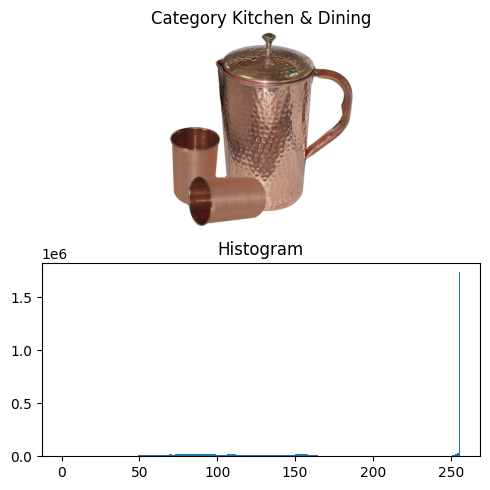

Image: e9420e9483f16db81c64dddf99f34841.jpg
Number of keypoints: 500
Descriptors size: (500, 32)


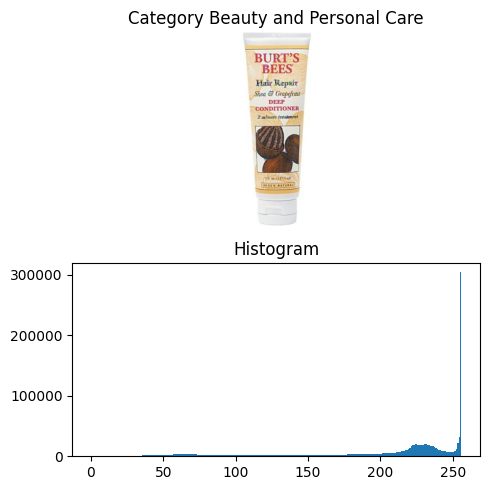

Image: 2d50e4c6ccf8befe9335ac8f97a11712.jpg
Number of keypoints: 500
Descriptors size: (500, 32)


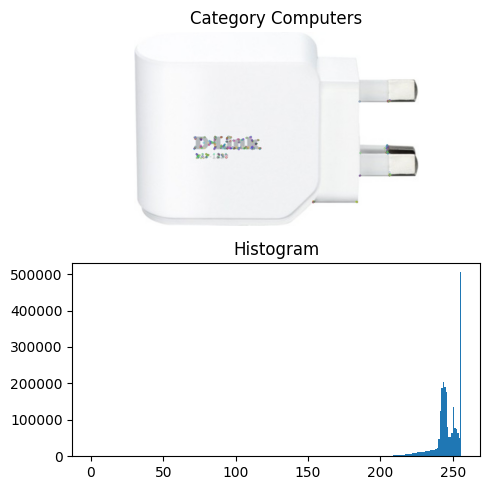

Image: d1899ab1d5c79ddaa311bc9f04d198ed.jpg
Number of keypoints: 500
Descriptors size: (500, 32)
Dropped image: 9743e6d1c9f3180483825fe4d2e97836.jpg
Time taken: 16.76s


In [203]:
display_keypoints(algo='ORB')
orb_descriptors, df_image_copy = get_descriptors(algo='ORB')

All descriptors shape: (503879, 32)
Number of clusters to test: 10
Full resolution clusters range: [ 70 141 212 283 354 425 496 567 638 709]
Test 1 - Creating 70 descriptors clusters...


100%|██████████| 1049/1049 [00:00<00:00, 5423.41it/s]


Visual bag of words dimension: (1049, 70)
Starting dimensionality reduction...
Time taken: 0.83s
Test 2 - Creating 141 descriptors clusters...


100%|██████████| 1049/1049 [00:00<00:00, 4326.84it/s]


Visual bag of words dimension: (1049, 141)
Starting dimensionality reduction...
Time taken: 1.16s
Test 3 - Creating 212 descriptors clusters...


100%|██████████| 1049/1049 [00:00<00:00, 3857.06it/s]


Visual bag of words dimension: (1049, 212)
Starting dimensionality reduction...
Time taken: 1.40s
Test 4 - Creating 283 descriptors clusters...


100%|██████████| 1049/1049 [00:00<00:00, 3349.23it/s]


Visual bag of words dimension: (1049, 283)
Starting dimensionality reduction...
Time taken: 1.56s
Test 5 - Creating 354 descriptors clusters...


100%|██████████| 1049/1049 [00:00<00:00, 2950.34it/s]


Visual bag of words dimension: (1049, 354)
Starting dimensionality reduction...
Time taken: 1.85s
Test 6 - Creating 425 descriptors clusters...


100%|██████████| 1049/1049 [00:00<00:00, 2322.61it/s]


Visual bag of words dimension: (1049, 425)
Starting dimensionality reduction...
Time taken: 2.15s
Test 7 - Creating 496 descriptors clusters...


100%|██████████| 1049/1049 [00:00<00:00, 2445.71it/s]


Visual bag of words dimension: (1049, 496)
Starting dimensionality reduction...
Time taken: 2.39s
Test 8 - Creating 567 descriptors clusters...


100%|██████████| 1049/1049 [00:00<00:00, 2216.63it/s]


Visual bag of words dimension: (1049, 567)
Starting dimensionality reduction...
Time taken: 2.49s
Test 9 - Creating 638 descriptors clusters...


100%|██████████| 1049/1049 [00:00<00:00, 2034.06it/s]


Visual bag of words dimension: (1049, 638)
Starting dimensionality reduction...
Time taken: 2.67s
Test 10 - Creating 709 descriptors clusters...


100%|██████████| 1049/1049 [00:00<00:00, 1856.65it/s]


Visual bag of words dimension: (1049, 709)
Starting dimensionality reduction...
Time taken: 2.77s
scores:
[(470, 0.039290488365160595), (192, 0.03627946620725688), (65, 0.034129628457892705), (310, 0.03291648980887048), (252, 0.03283895443642081), (418, 0.032825728640867344), (129, 0.03254605265363913), (556, 0.03066713360655627), (516, 0.02962367875828078), (367, 0.029428942158665972)]
Diplay the T-SNE plot for the best result...
ARI: 0.04, Vector dimension: 470
(1049, 4)


<Figure size 1300x500 with 0 Axes>

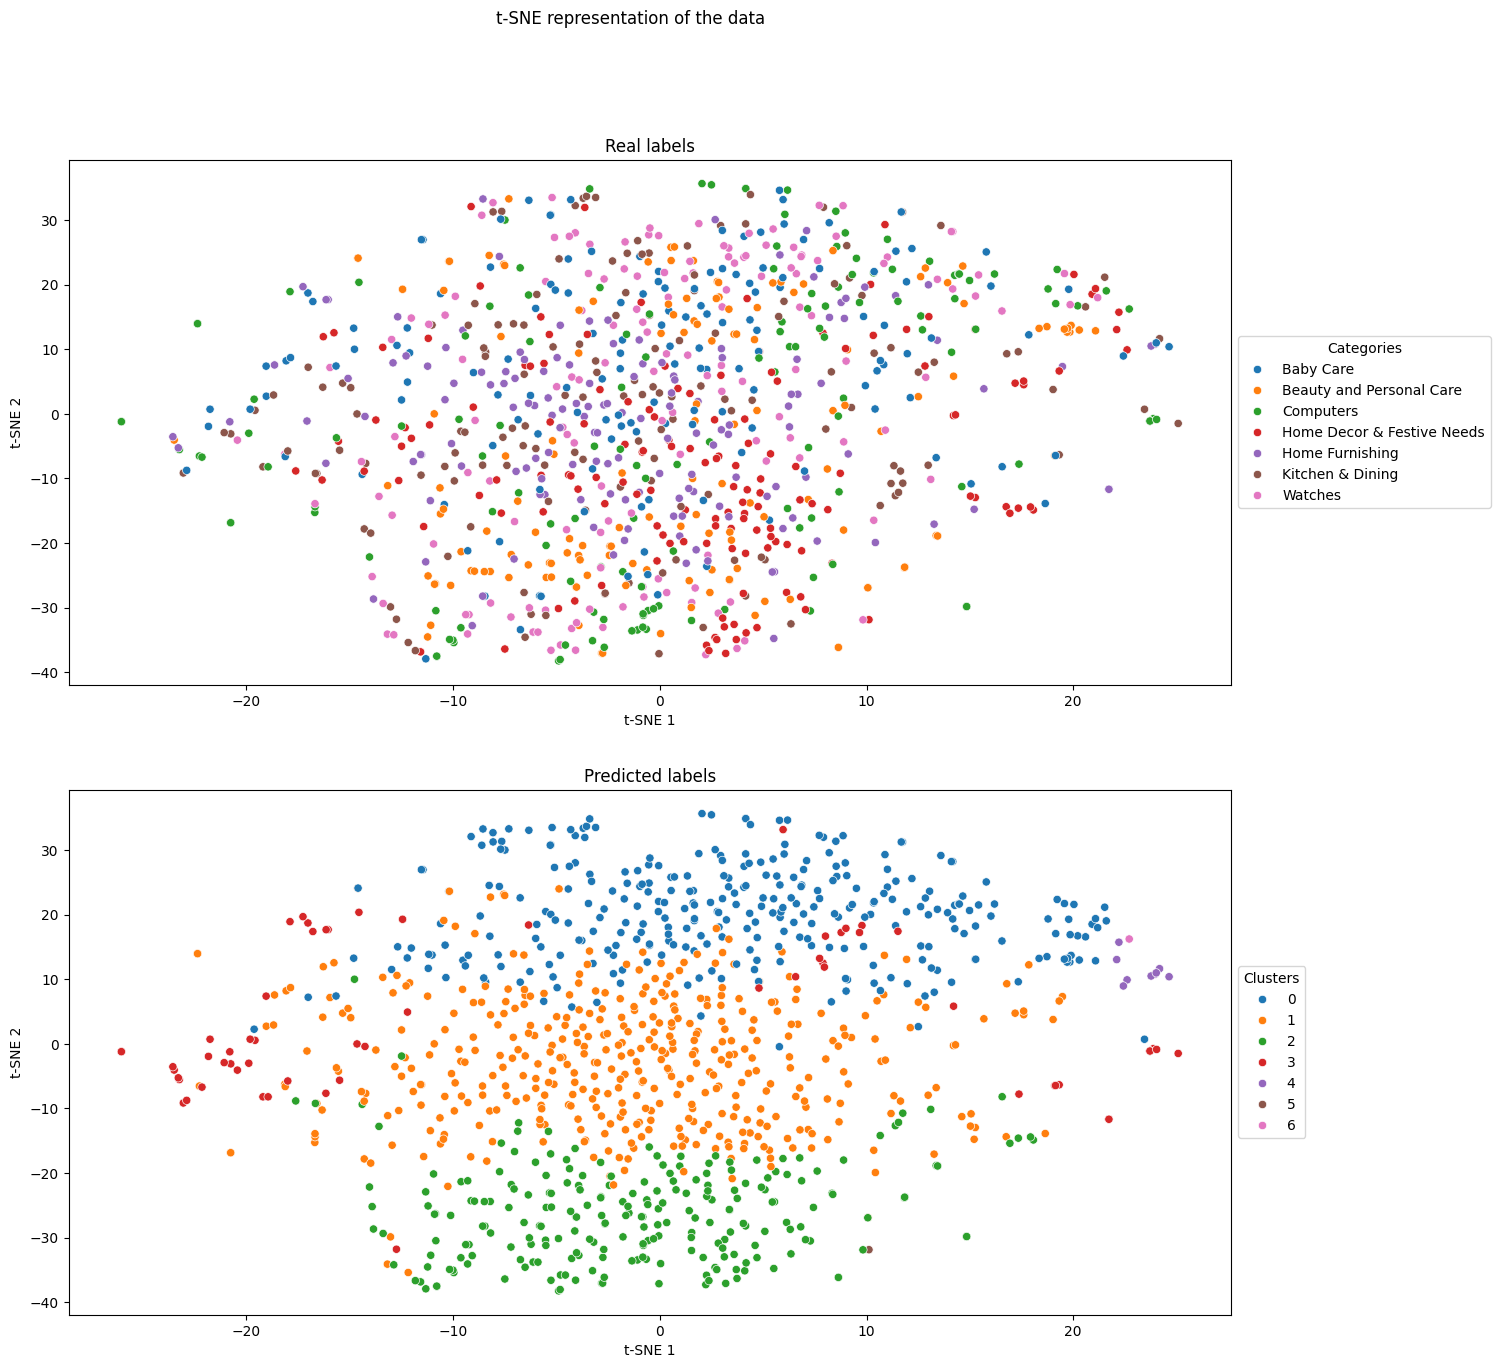

In [204]:
ari_orb, pca_vector_orb, labels_orb, results_comparison = compare_and_get_best_clusters(orb_descriptors, df_image_copy['category_code'], method='fullsize', algo='ORB', results_comparison=results_comparison)
df_tsne_orb = plot_tsne(pca_vector_orb, ari_orb, labels_orb, df_image_copy['main_category'])

In [205]:
display(results_comparison)

Algorithm           Method       ARI      Time
0      SIFT  Full resolution  0.048312  6.197920
1      SIFT     resizing_img  0.034080  2.442755
2      SIFT        greyscale  0.051837  1.361575
3       ORB         fullsize  0.039290  2.485676

Dropped image: f3ad282dac6ef0e30585a49ac67a322b.jpg
Dropped image: 9743e6d1c9f3180483825fe4d2e97836.jpg
Dropped image: c8e2c85eccdc9db55eeb2231385e4f1c.jpg
Dropped image: 7c785e9e26092c0b6ed038085e90d89d.jpg
Dropped image: c5720509a67da707afcb6f4f0282d529.jpg
Dropped image: e426290a8f57e82680275bb91df91ad1.jpg
Dropped image: e86daf9ebcdfc5c5dd088cdb7f8f8db6.jpg
Dropped image: fc009e0b404034e5ea065ba980917f33.jpg
Dropped image: 832a66ce379b4c98fd3d748eebd7ae4c.jpg
Time taken: 14.60s
All descriptors shape: (354028, 32)
Number of clusters to test: 10
Full resolution clusters range: [ 70 128 186 245 303 361 420 478 536 595]
Test 1 - Creating 70 descriptors clusters...


100%|██████████| 1041/1041 [00:00<00:00, 6125.87it/s]


Visual bag of words dimension: (1041, 70)
Starting dimensionality reduction...
Time taken: 0.62s
Test 2 - Creating 128 descriptors clusters...


100%|██████████| 1041/1041 [00:00<00:00, 5586.38it/s]


Visual bag of words dimension: (1041, 128)
Starting dimensionality reduction...
Time taken: 0.98s
Test 3 - Creating 186 descriptors clusters...


100%|██████████| 1041/1041 [00:00<00:00, 4896.40it/s]


Visual bag of words dimension: (1041, 186)
Starting dimensionality reduction...
Time taken: 1.12s
Test 4 - Creating 245 descriptors clusters...


100%|██████████| 1041/1041 [00:00<00:00, 4175.96it/s]


Visual bag of words dimension: (1041, 245)
Starting dimensionality reduction...
Time taken: 1.18s
Test 5 - Creating 303 descriptors clusters...


100%|██████████| 1041/1041 [00:00<00:00, 3351.43it/s]


Visual bag of words dimension: (1041, 303)
Starting dimensionality reduction...
Time taken: 1.61s
Test 6 - Creating 361 descriptors clusters...


100%|██████████| 1041/1041 [00:00<00:00, 3303.01it/s]


Visual bag of words dimension: (1041, 361)
Starting dimensionality reduction...
Time taken: 1.75s
Test 7 - Creating 420 descriptors clusters...


100%|██████████| 1041/1041 [00:00<00:00, 2827.11it/s]


Visual bag of words dimension: (1041, 420)
Starting dimensionality reduction...
Time taken: 1.72s
Test 8 - Creating 478 descriptors clusters...


100%|██████████| 1041/1041 [00:00<00:00, 2781.00it/s]


Visual bag of words dimension: (1041, 478)
Starting dimensionality reduction...
Time taken: 1.86s
Test 9 - Creating 536 descriptors clusters...


100%|██████████| 1041/1041 [00:00<00:00, 2539.22it/s]


Visual bag of words dimension: (1041, 536)
Starting dimensionality reduction...
Time taken: 2.01s
Test 10 - Creating 595 descriptors clusters...


100%|██████████| 1041/1041 [00:00<00:00, 2217.89it/s]


Visual bag of words dimension: (1041, 595)
Starting dimensionality reduction...
Time taken: 2.01s
scores:
[(116, 0.020402714154629662), (346, 0.020228778748201386), (64, 0.018553504569096258), (166, 0.01807709793135672), (214, 0.0107754007899296), (420, 0.00718084483741488), (259, 0.006442897912720807), (386, 0.006121212531114999), (304, 0.005211077933563506), (454, 0.0004642515952453229)]
Diplay the T-SNE plot for the best result...
ARI: 0.02, Vector dimension: 116
(1041, 4)


<Figure size 1300x500 with 0 Axes>

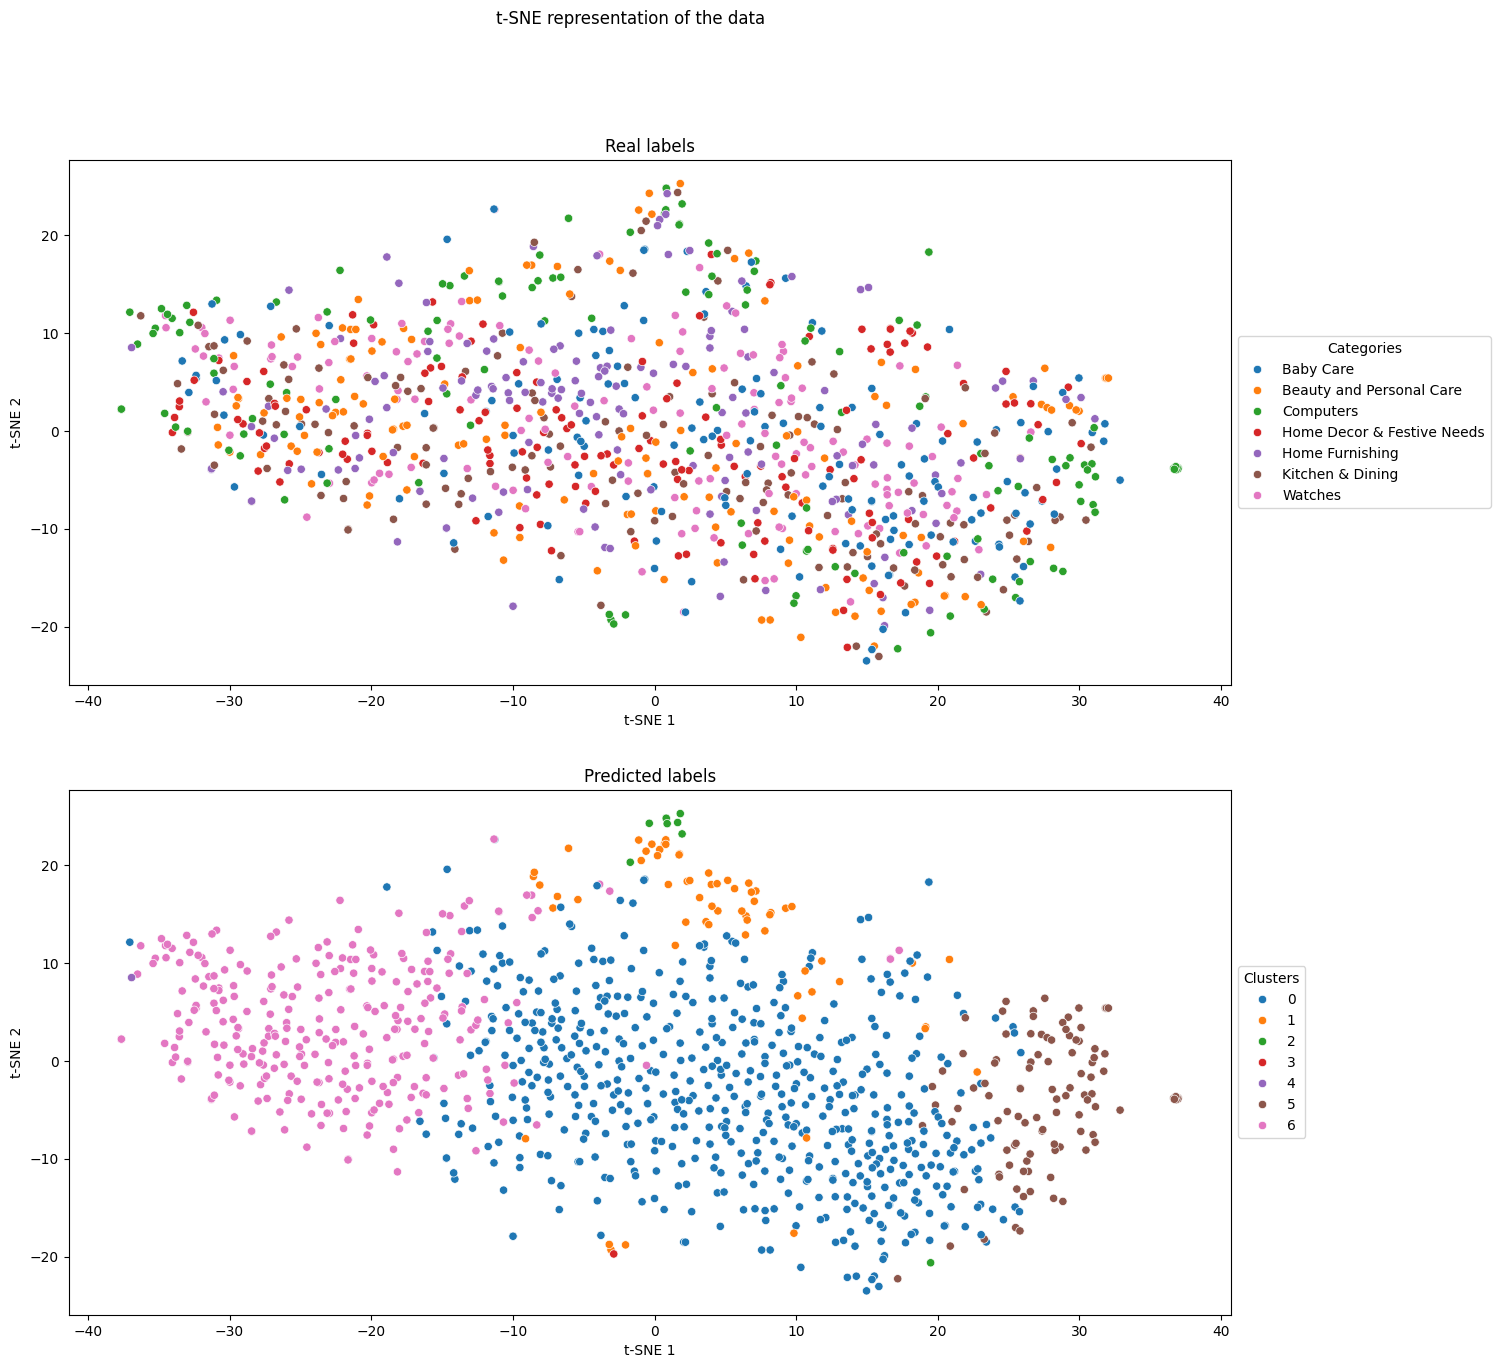

Algorithm           Method       ARI      Time
0      SIFT  Full resolution  0.048312  6.197920
1      SIFT     resizing_img  0.034080  2.442755
2      SIFT        greyscale  0.051837  1.361575
3       ORB         fullsize  0.039290  2.485676
4       ORB     resizing_img  0.020403  0.981635

In [206]:
orb_resized_descriptors, df_image_copy = get_descriptors(algo='ORB', resize=300)
ari_orb_resized, pca_vector_orb_resized, labels_orb_resized, results_comparison = compare_and_get_best_clusters(orb_resized_descriptors, df_image_copy['category_code'], method='resizing_img', algo='ORB', results_comparison=results_comparison)
df_tsne_orb_resized = plot_tsne(pca_vector_orb_resized, ari_orb_resized, labels_orb_resized, df_image_copy['main_category'])
display(results_comparison)

## CNN

Convolutionnal Neural Networks are used as unsupervised image classification solution. The interest of this deep learning models is that the image features are automatically found.

### VGG-16

Pre-trained CNN composed with :
- 13 convolutional layers
- 3 fully-connected layers

Input = colored image 224 x 224 px
Output = vector of length 1000

![VGG-16 layers](https://user.oc-static.com/upload/2018/03/14/15209905022025_vgg-16-flat.png)

Convolutionnal layer hyperparameters :
- filters size F = 3 x 3
- step S = 1 px
- zero-padding P = 1 px (input volumes size = output size)
- activation function = ReLU

Pooling hyperparameters :
- cell size F = 2x2 px
- S = 2px

#### Setup

In [15]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [35]:
# Instantiate the pretrained model without the last layers
# with the parameter include_top=False and precise the input shape
model = VGG16(include_top=False, input_shape=(224, 224, 3), pooling='avg', classes=len(classes))
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
def preprocess_image(image: str, path: str=path, target_size: tuple =(224, 224)) -> np.array:
    """Preprocess an image for the model.

    Args:
        image (str): image.
        path (str, optional): path. Defaults to path.
        target_size (tuple, optional): target_size. Defaults to (224, 224).

    Returns:
        np.array: Preprocessed image
    """
    # load the image
    image = load_img(path + image, target_size=target_size)
    # convert the image to an array
    image_array = img_to_array(image)
    # reshape the image
    image_array = image_array.reshape((1, image_array.shape[0], image_array.shape[1], image_array.shape[2]))

    return image_array

In [20]:
# Train only the classifier
for layer in model.layers:
    layer.trainable = False

A VGG16 takes as input images 224 x 224 in color (channel = 3), we have to pre process the images before sending them to the CNN.

In [36]:
# Extract images features
embeddings = []
for row in images_df.itertuples():
    image_features = preprocess_image(row.image)
    features = model.predict(image_features)
    embeddings.append(features.flatten())

# Convert the embeddings to a numpy array
embeddings = np.array(embeddings)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━

/Users/ikusawalaetitia/Desktop/Desktop - Ikusawa’s Mac mini/work/projects/python/P6-txt-img_classification/p6env/lib/python3.12/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━

In [208]:
ari, reduced_embeddings, clusters = compute_ari(embeddings, images_df['main_category'])

Starting dimensionality reduction...


Diplay the T-SNE plot for the best result...
ARI: 0.35, Vector dimension: 334
(1050, 4)


<Figure size 1300x500 with 0 Axes>

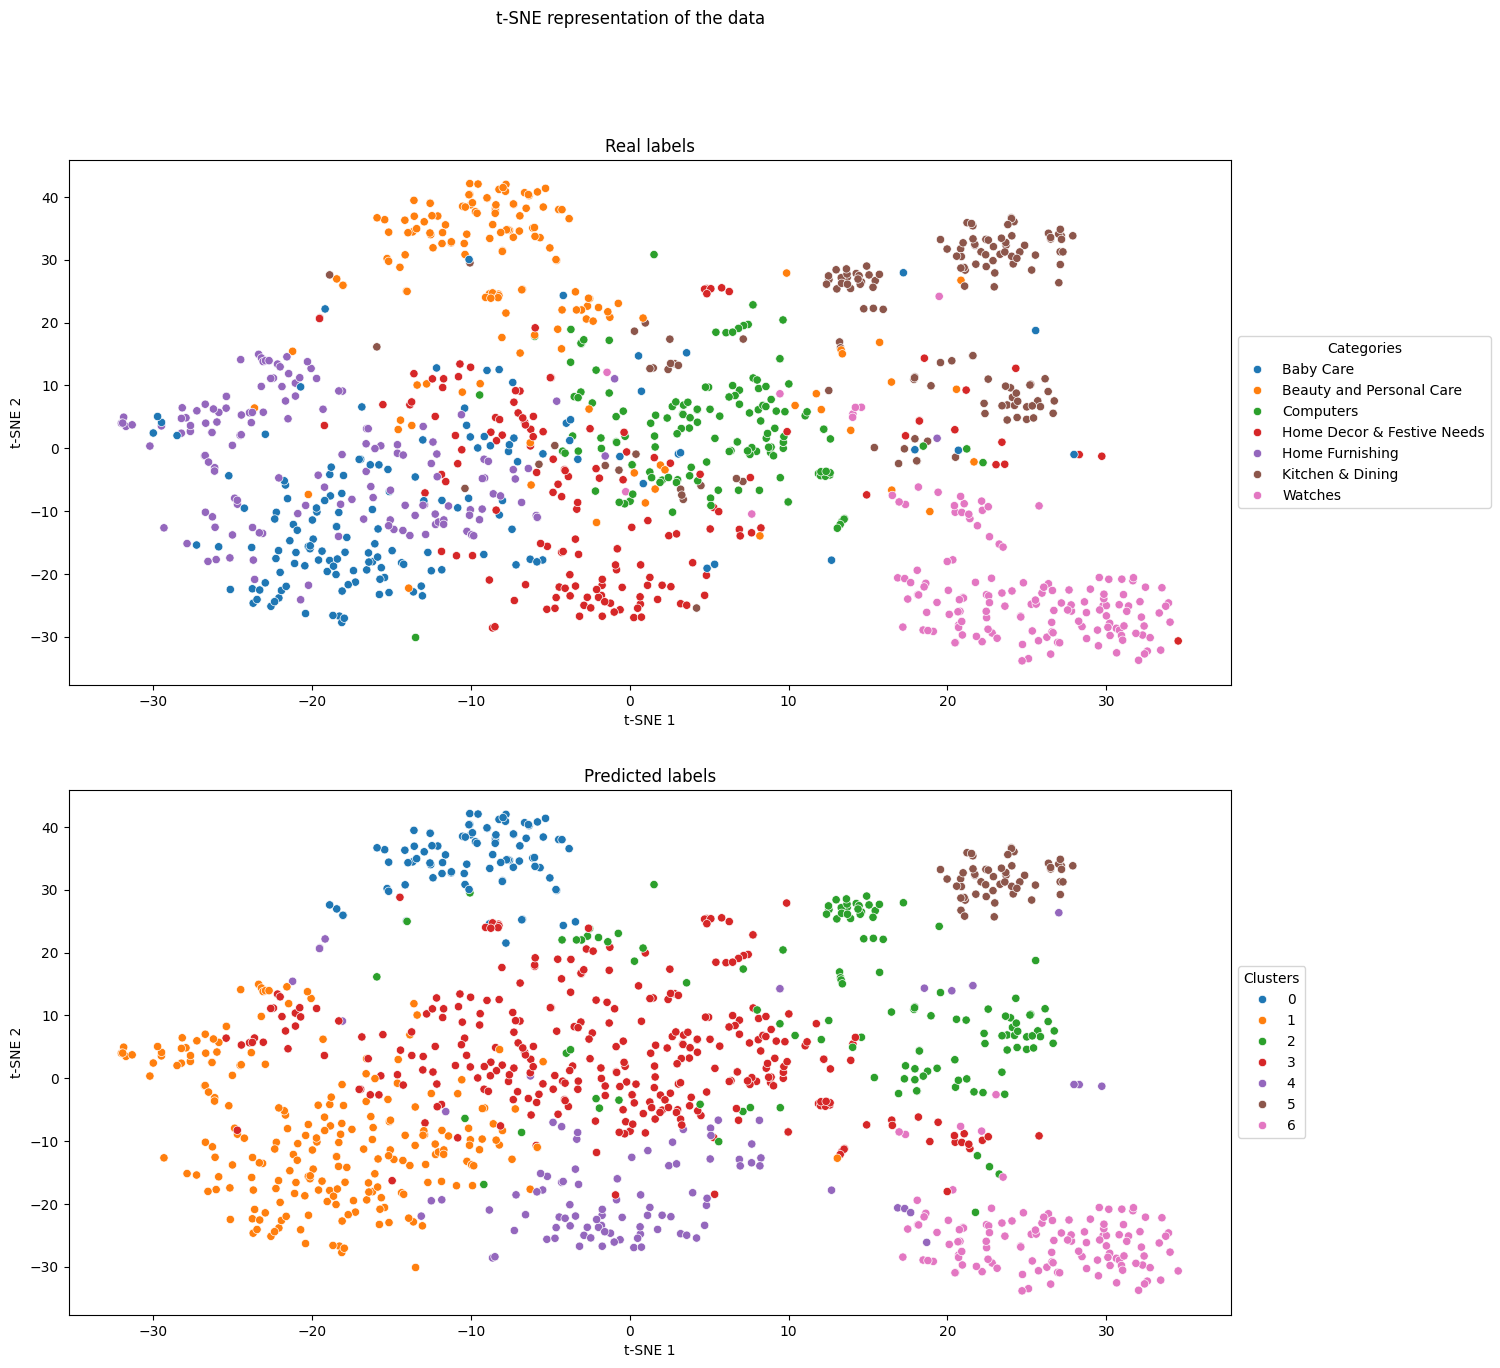

tsne1      tsne2            class  clusters
0    -21.466230  11.859130  Home Furnishing         1
1    -15.125367  -6.907096        Baby Care         1
2    -21.666176  -5.866270        Baby Care         1
3    -25.009106   0.443669  Home Furnishing         1
4    -26.758499  -1.225793  Home Furnishing         1
...         ...        ...              ...       ...
1045 -20.712811   9.751430        Baby Care         3
1046  -8.771573   0.382395        Baby Care         3
1047 -10.034124   1.786252        Baby Care         3
1048  -9.565853   0.032605        Baby Care         3
1049  -7.574497   0.537712        Baby Care         3

[1050 rows x 4 columns]

In [209]:
plot_tsne(reduced_embeddings, ari, clusters, images_df['main_category'])

In [210]:
new_row = pd.DataFrame([{'Algorithm': 'VGG16', 'Method': 'VGG16', 'ARI': ari}])
results_comparison = pd.concat([results_comparison, new_row], ignore_index=True)
display(results_comparison)

Algorithm           Method       ARI      Time
0      SIFT  Full resolution  0.048312  6.197920
1      SIFT     resizing_img  0.034080  2.442755
2      SIFT        greyscale  0.051837  1.361575
3       ORB         fullsize  0.039290  2.485676
4       ORB     resizing_img  0.020403  0.981635
5     VGG16            VGG16  0.345335       NaN

### ResNet